# Guided Capstone 2 - Predicting NBA Game Outcomes Using Machine Learning

The study will analyze NBA regular season statistics with the goal of predicting wins and losses. Statistics collected over the period of 2008 to 2020 will be analyzed using machine learning principles and tools. The data was acquired from various providers from kaggle. Our goal is to match or better the upper bound of currently achievable prediction accuracies ranging between 66-72%. 


# Section 0: Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from datetime import datetime

# Section 1: Data Importation and Cleaning


# 1.1 Combining Datasets

From Kaggle, separate sets of data have been acquired for both player statistics and team statistics. These sets are separated by seasons and need to be combined into one dataset.

In [2]:
#Appending the season sets into one team statistic and one player statistic dataframes.
start_year = 2008
end_year = 2009

team_stats = pd.DataFrame()
player_stats = pd.DataFrame()

for i in range(12) :
    player_stats_file_path = 'player_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
    team_stats_file_path = 'team_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
    player_stats = player_stats.append(pd.read_csv(player_stats_file_path))
    team_stats = team_stats.append(pd.read_csv(team_stats_file_path))
    
    start_year = start_year + 1
    end_year = end_year + 1

In [3]:
print(player_stats.shape)
print(team_stats.shape)

(373069, 26)
(15348, 124)


In [4]:
team_stats.to_csv('Team_Stats.csv')

# 1.2 Player Statistics 

We will be wrangling datasets for both player and team in the next few sections. Cleaning and conforming the data, and most importantly building a gameid column to link the two data sets. 

In [5]:
player_stats.head()

Player        Date                 Team         Against  Home  \
0        LeBron James  2008-10-28  Cleveland Cavaliers  Boston Celtics     0   
1        Delonte West  2008-10-28  Cleveland Cavaliers  Boston Celtics     0   
2         Mo Williams  2008-10-28  Cleveland Cavaliers  Boston Celtics     0   
3  Zydrunas Ilgauskas  2008-10-28  Cleveland Cavaliers  Boston Celtics     0   
4         Ben Wallace  2008-10-28  Cleveland Cavaliers  Boston Celtics     0   

      MP   FG   FGA    FG%   3P  ...  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
0  36.00  9.0  21.0  0.429  0.0  ...  6.0  7.0  6.0  2.0  1.0  3.0  4.0  22.0   
1  35.29  2.0   4.0  0.500  0.0  ...  2.0  2.0  2.0  0.0  0.0  1.0  0.0   6.0   
2  31.18  4.0  10.0  0.400  3.0  ...  3.0  3.0  2.0  1.0  0.0  4.0  5.0  12.0   
3  30.24  3.0   5.0  0.600  0.0  ...  5.0  8.0  1.0  0.0  0.0  4.0  3.0  15.0   
4  19.03  1.0   1.0  1.000  0.0  ...  4.0  4.0  0.0  0.0  1.0  1.0  2.0   2.0   

    +/-                                           GameLink  
0  -3.0  https://www.basketball-reference.com/boxscores...  
1 -10.0  https://www.basketball-reference.com/boxscores...  
2   3.0  https://www.basketball-reference.com/boxscores...  
3   7.0  https://www.basketball-reference.com/boxscores...  
4  -1.0  https://www.basketball-reference.com/boxscores...  

[5 rows x 26 columns]

In [6]:
player_stats.describe()

Home             MP             FG            FGA  \
count  373069.000000  311326.000000  311326.000000  311326.000000   
mean        0.515875      22.840477       3.641630       7.986805   
std         0.499749      10.922109       3.017081       5.615867   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000      15.040000       1.000000       4.000000   
50%         1.000000      23.450000       3.000000       7.000000   
75%         1.000000      31.460000       5.000000      11.000000   
max         1.000000      64.580000      24.000000      50.000000   

                 FG%            3P            3PA            3P%  \
count  295932.000000  311326.00000  311326.000000  199196.000000   
mean        0.441478       0.80294       2.250056       0.325172   
std         0.236252       1.23164       2.554412       0.307660   
min         0.000000       0.00000       0.000000       0.000000   
25%         0.313000       0.00000       0.000000       0.000000   
50%         0.444000       0.00000       1.000000       0.333000   
75%         0.571000       1.00000       4.000000       0.500000   
max         1.000000      14.00000      24.000000       1.000000   

                  FT            FTA  ...            ORB            DRB  \
count  311326.000000  311326.000000  ...  311326.000000  311326.000000   
mean        1.693896       2.223743  ...       1.011412       3.075278   
std         2.315300       2.827887  ...       1.395258       2.705052   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       1.000000   
50%         1.000000       2.000000  ...       1.000000       2.000000   
75%         3.000000       4.000000  ...       2.000000       4.000000   
max        26.000000      39.000000  ...      18.000000      23.000000   

                TRB            AST            STL            BLK  \
count  311326.00000  311326.000000  311326.000000  311326.000000   
mean        4.08669       2.118628       0.723187       0.464661   
std         3.50173       2.487667       0.973774       0.856513   
min         0.00000       0.000000       0.000000       0.000000   
25%         1.00000       0.000000       0.000000       0.000000   
50%         3.00000       1.000000       0.000000       0.000000   
75%         6.00000       3.000000       1.000000       1.000000   
max        31.00000      25.000000      10.000000      12.000000   

                 TOV             PF            PTS            +/-  
count  311326.000000  311326.000000  311326.000000  311276.000000  
mean        1.302291       1.952192       9.780095      -0.010345  
std         1.392476       1.475046       8.025905      10.754541  
min         0.000000       0.000000       0.000000     -57.000000  
25%         0.000000       1.000000       3.000000      -7.000000  
50%         1.000000       2.000000       8.000000       0.000000  
75%         2.000000       3.000000      14.000000       7.000000  
max        12.000000       6.000000      70.000000      57.000000  

[8 rows x 21 columns]

In [7]:
#Dropping unecessary columns and % columns (we will separate attemtped shot #s to made and misses instead of %.)
player_stats.drop(columns = ['FG%', '3P%', 'FT%', 'GameLink', '+/-'], inplace = True)

In [8]:
#dropping for NaNs
player_stats = player_stats.dropna()
player_stats.isna().sum()

Player     0
Date       0
Team       0
Against    0
Home       0
MP         0
FG         0
FGA        0
3P         0
3PA        0
FT         0
FTA        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [9]:
player_stats.reset_index(drop = True, inplace = True)

In [10]:
#Using a combination of Hometeam abbreviation (NBA official team abbreviation) and date, we will create unique game ids
#Converting 'Date' column to datetime object and filtering for regular season games only
player_stats['Date'] = pd.to_datetime(player_stats['Date'])

dates =[['2008-10-28', '2009-04-16'],['2009-10-27', '2010-04-14'], ['2010-10-26', '2011-04-13' ], ['2011-12-25', '2012-04-26'], ['2012-10-30', '2013-04-17'], ['2013-10-29', '2014-04-16'], ['2014-10-28', '2015-04-15'], ['2015-10-27', '2016-04-13'], ['2016-10-25', '2017-04-12'], ['2017-10-17', '2018-04-11'], ['2018-10-16', '2019-04-10'], ['2019-10-22', '2020-08-14' ]]

is_regsea = lambda date : (date>= pd.to_datetime(start_date)) & (date<= pd.to_datetime(end_date))
all_regsea = pd.DataFrame()

for start_date, end_date in dates:
    print(start_date, end_date)
    all_regsea = pd.concat([all_regsea, player_stats.Date.apply(is_regsea)], axis=1)

#Applying filter to player_stats
all_regsea = all_regsea.sum(axis=1)
regsea = np.where(all_regsea == 1)[0]
player_stats = player_stats.loc[regsea]

2008-10-28 2009-04-16
2009-10-27 2010-04-14
2010-10-26 2011-04-13
2011-12-25 2012-04-26
2012-10-30 2013-04-17
2013-10-29 2014-04-16
2014-10-28 2015-04-15
2015-10-27 2016-04-13
2016-10-25 2017-04-12
2017-10-17 2018-04-11
2018-10-16 2019-04-10
2019-10-22 2020-08-14


In [11]:
#Creating a GameID that will identify games for both players statistics and team statistics
#Team have changed names over the selected time period, will need to use 1 name to unify data
#New Jersey Nets moved to Brooklyn and known now as the (BKN) Brooklyn Nets
#New Orleans Hornets are now the (NOP) New Orlean Pelicans
#Charlotte Bobcats are now the (CHO) Charlotte Hornets 
name_change = player_stats[['Team', 'Against', 'Home']]

#Pulling abbreviations from team names, New York and New Jersey will both result in 'New'
#Changing names before the pull will give us the correct abbreviations
name_change['Team'] = name_change['Team'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })
name_change['Against'] = name_change['Against'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })

#Pulling abbreviation and date to create game ID
name_change['abbr'] = np.where(name_change['Home']==1, name_change['Team'].str[0:3].str.upper(), name_change['Against'].str[0:3].str.upper())

#Abbreviations work for most teams, but a few will still require fixing. 
name_change['abbr'] = name_change['abbr'].replace({'SAN':'SAS', 'OKL': 'OKC', 'GOL':'GSW'})
name_change['Team'] = name_change['Team'].str[0:3].str.upper().replace({'SAN':'SAS', 'OKL': 'OKC', 'GOL':'GSW'})

player_stats['Teamabbr'] = name_change['Team']

player_stats['gameID'] =  player_stats['Date'].dt.strftime('%Y%m%d') + name_change['abbr']
player_stats.drop(columns = 'Home', inplace=True)
player_stats.head()

/var/folders/n4/x3431d_565s25yt88cgb8slc0000gp/T/ipykernel_25917/2447897873.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['Team'] = name_change['Team'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })
/var/folders/n4/x3431d_565s25yt88cgb8slc0000gp/T/ipykernel_25917/2447897873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Player       Date                 Team         Against     MP  \
0        LeBron James 2008-10-28  Cleveland Cavaliers  Boston Celtics  36.00   
1        Delonte West 2008-10-28  Cleveland Cavaliers  Boston Celtics  35.29   
2         Mo Williams 2008-10-28  Cleveland Cavaliers  Boston Celtics  31.18   
3  Zydrunas Ilgauskas 2008-10-28  Cleveland Cavaliers  Boston Celtics  30.24   
4         Ben Wallace 2008-10-28  Cleveland Cavaliers  Boston Celtics  19.03   

    FG   FGA   3P  3PA   FT  ...  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
0  9.0  21.0  0.0  4.0  4.0  ...  6.0  7.0  6.0  2.0  1.0  3.0  4.0  22.0   
1  2.0   4.0  0.0  1.0  2.0  ...  2.0  2.0  2.0  0.0  0.0  1.0  0.0   6.0   
2  4.0  10.0  3.0  5.0  1.0  ...  3.0  3.0  2.0  1.0  0.0  4.0  5.0  12.0   
3  3.0   5.0  0.0  0.0  9.0  ...  5.0  8.0  1.0  0.0  0.0  4.0  3.0  15.0   
4  1.0   1.0  0.0  0.0  0.0  ...  4.0  4.0  0.0  0.0  1.0  1.0  2.0   2.0   

   Teamabbr       gameID  
0       CLE  20081028BOS  
1       CLE  20081028BOS  
2       CLE  20081028BOS  
3       CLE  20081028BOS  
4       CLE  20081028BOS  

[5 rows x 22 columns]

In [12]:
player_stats.sort_values(by = 'Date', ascending = False, inplace = True)
player_stats.reset_index(inplace = True, drop = True)

In [13]:
#Separating Attempted shots = Missed + Made
player_stats['FTM'] = player_stats['FTA'] - player_stats['FT']
player_stats['FGM'] = player_stats['FGA'] - player_stats['FG']
player_stats.columns

Index(['Player', 'Date', 'Team', 'Against', 'MP', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Teamabbr', 'gameID', 'FTM', 'FGM'],
      dtype='object')

In [14]:
player_stats.shape
#Compared to the initial shape (373069, 27)

(291008, 24)

In [15]:
#reordering column order
new_order = [21, 0, 2, 3, 1, 4, 5, 6, 23, 7, 8, 9 ,10, 11, 22, 12, 13, 14, 15, 16, 17, 18, 19, 20]

player_stats = player_stats[player_stats.columns[new_order]]

clean_player_stats = player_stats
clean_player_stats.head()

gameID           Player             Team             Against  \
0  20200814HOU     Ben McLemore  Houston Rockets  Philadelphia 76ers   
1  20200814IND      Chris Silva       Miami Heat      Indiana Pacers   
2  20200814TOR  Dewan Hernandez  Toronto Raptors      Denver Nuggets   
3  20200814IND    Kendrick Nunn       Miami Heat      Indiana Pacers   
4  20200814IND      Tyler Herro       Miami Heat      Indiana Pacers   

        Date     MP   FG   FGA   FGM   3P  ...  FTM  DRB   TRB  AST  STL  BLK  \
0 2020-08-14  11.21  1.0   4.0   3.0  1.0  ...  0.0  2.0   2.0  1.0  1.0  0.0   
1 2020-08-14  24.29  2.0   4.0   2.0  0.0  ...  3.0  7.0  11.0  1.0  0.0  3.0   
2 2020-08-14  12.42  2.0   6.0   4.0  0.0  ...  0.0  4.0   7.0  1.0  0.0  0.0   
3 2020-08-14  32.58  8.0  27.0  19.0  1.0  ...  0.0  1.0   2.0  4.0  3.0  1.0   
4 2020-08-14  27.56  6.0  16.0  10.0  3.0  ...  0.0  0.0   1.0  3.0  0.0  0.0   

   TOV   PF   PTS  Teamabbr  
0  0.0  0.0   3.0       HOU  
1  1.0  3.0   5.0       MIA  
2  1.0  0.0   4.0       TOR  
3  5.0  1.0  23.0       MIA  
4  3.0  2.0  16.0       MIA  

[5 rows x 24 columns]

# 1.3 Saving Cleaned Player Stats Data to CSV

In [16]:
clean_player_stats.to_csv('Cleaned_Player_Stats.csv')

# 1.4 Team Statistics

In [17]:
#read in team_stats
team_stats = pd.read_csv('Team_Stats.csv')

#Converting 'gmDate' column to datetime object
team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])
team_stats.reset_index(drop=True)

#Removing extra index column
team_stats= team_stats.iloc[:,1:]
team_stats.head()

gmDate seasonType   season  teamWins  teamLosses teamAbbr teamLoc  \
0 2008-10-28    Regular  2008-09         0           1      CLE    Away   
1 2008-10-28    Regular  2008-09         0           1      MIL    Away   
2 2008-10-28    Regular  2008-09         0           1      POR    Away   
3 2008-10-29    Regular  2008-09         1           0      TOR    Away   
4 2008-10-29    Regular  2008-09         1           0      NJN    Away   

  teamRslt  teamDayOff  teamPTS  ...  opptOrtg  opptDrtg  opptEDiff  \
0     Loss         0.0     85.0  ...      96.9      91.5        5.4   
1     Loss         0.0     95.0  ...     120.3     105.8       14.5   
2     Loss         0.0     76.0  ...     107.7      85.3       22.4   
3      Win         0.0     95.0  ...      99.8     112.8      -13.0   
4      Win         0.0     95.0  ...      94.6     105.7      -11.1   

   opptPlay%  opptAR  opptAST/TO  opptSTL/TO  opptPoss  opptPace  matchWinner  
0       0.41   17.57        1.00        0.62      92.9      92.9          BOS  
1       0.48   28.53        1.50        0.50      89.8      89.8          CHI  
2       0.44   18.08        1.27        0.53      89.1      89.1          LAL  
3       0.37   14.47        0.88        0.18      84.2      84.2          TOR  
4       0.36   17.86        1.20        0.27      89.9      89.9          NJN  

[5 rows x 124 columns]

In [18]:
#Just want the data from the regular season.
team_stats = team_stats[team_stats['seasonType']=='Regular']

#To be consistent, we will run through our regular season dates filter
team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])
team_stats.reset_index(inplace = True, drop = True)

all_regsea2 = pd.DataFrame()
is_regsea = lambda date : (date>= pd.to_datetime(start_date)) & (date<= pd.to_datetime(end_date))

for start_date, end_date in dates:
    print(start_date, end_date)
    all_regsea2 = pd.concat([all_regsea2, team_stats.gmDate.apply(is_regsea)], axis=1)
    
all_regsea2 = all_regsea2.sum(axis=1)
regsea2 = np.where(all_regsea2 == 1)[0]
team_stats = team_stats.loc[regsea2]

2008-10-28 2009-04-16
2009-10-27 2010-04-14
2010-10-26 2011-04-13
2011-12-25 2012-04-26
2012-10-30 2013-04-17
2013-10-29 2014-04-16
2014-10-28 2015-04-15
2015-10-27 2016-04-13
2016-10-25 2017-04-12
2017-10-17 2018-04-11
2018-10-16 2019-04-10
2019-10-22 2020-08-14


In [19]:
#Creating gameID column for team stats
#similary we will change team names/abbreviations to unify data

team_name_change = team_stats['opptAbbr'].replace({'NJN':'BKN', 'CHA':'CHO', 'BRK':'BKN', 'NOH' : 'NOP'})
team_stats['teamAbbr'] = team_stats['teamAbbr'].replace({'NJN':'BKN', 'CHA':'CHO', 'BRK':'BKN', 'NOH' : 'NOP'})
team_stats['opptAbbr'] = team_stats['opptAbbr'].replace({'NJN':'BKN', 'CHA':'CHO', 'BRK':'BKN', 'NOH' : 'NOP'})

#Creating date sting portion of the game id
dateString =  team_stats['gmDate'].dt.strftime('%Y%m%d')
team_stats['GameID'] = dateString + team_name_change

In [20]:
#Checking our gameID's (oppt is the home team in this dataset)
team_stats[['GameID','teamAbbr', 'opptAbbr', 'opptLoc']][team_stats['gmDate'] == datetime(2008,10,28)]

GameID teamAbbr opptAbbr opptLoc
0  20081028BOS      CLE      BOS    Home
1  20081028CHI      MIL      CHI    Home
2  20081028LAL      POR      LAL    Home

In [21]:
team_stats.columns

Index(['gmDate', 'seasonType', 'season', 'teamWins', 'teamLosses', 'teamAbbr',
       'teamLoc', 'teamRslt', 'teamDayOff', 'teamPTS',
       ...
       'opptDrtg', 'opptEDiff', 'opptPlay%', 'opptAR', 'opptAST/TO',
       'opptSTL/TO', 'opptPoss', 'opptPace', 'matchWinner', 'GameID'],
      dtype='object', length=125)

In [22]:
#Removing percentage columns, and renaming columns
team_stats.drop(columns = ['seasonType', 'teamFG%', 'team2P%', 'team3P%', 'teamFT%', 'teamTREB%', 'teamASST%', 'teamTS%', 'teamEFG%', 'teamOREB%', 'teamLoc', 'teamDREB%', 'teamTO%', 'teamSTL%', 'teamBLK%', 'teamBLKR', 'teamPPS', 'teamFIC', 'teamFIC40' , 'teamPlay%', 'teamAR', 'teamPoss', 'teamPace', 'teamSTL/TO', 'teamEDiff', 'opptEDiff', 'teamAST/TO', 'opptAST/TO', 'opptFG%', 'oppt2P%', 'oppt3P%', 'opptFT%', 'opptTREB%', 'opptASST%', 'opptTS%', 'opptEFG%', 'opptLoc', 'opptOREB%', 'opptDREB%', 'opptTO%', 'opptSTL%', 'opptBLK%', 'opptBLKR', 'opptPPS', 'opptFIC', 'opptFIC40', 'opptPlay%', 'opptAR', 'opptSTL/TO', 'opptPoss', 'opptPace'], inplace = True)
team_stats.rename(columns = {'gmDate' : 'Date', 'teamAbbr' : 'A_Team', 'opptAbbr' : 'H_Team' ,'teamFGM': 'teamFGMade', 'team2PM' : 'team2PMade' , 'team3PM' : 'team3PMade', 'teamFTM' : 'teamFTMade',   'opptFGM': 'opptFGMade', 'oppt2PM': 'oppt2PMade', 'oppt3PM' : 'oppt3PMade', 'opptFTM' : 'opptFTMade'}, inplace = True)
team_stats['H_Loc'] = team_stats['H_Team']

#Separating statistics
team_stats['teamFGMissed'] = team_stats['teamFGA'] - team_stats['teamFGMade']
team_stats['team2PMissed'] = team_stats['team2PA'] - team_stats['team2PMade'] 
team_stats['team3PMissed'] = team_stats['team3PA'] - team_stats['team3PMade']
team_stats['opptFGMissed'] = team_stats['opptFGA'] - team_stats['opptFGMade']
team_stats['oppt2PMissed'] = team_stats['oppt2PA'] - team_stats['oppt2PMade']
team_stats['oppt3PMissed'] = team_stats['oppt3PA'] - team_stats['oppt3PMade']

team_stats.sort_values(by = 'Date', ascending = False, inplace=True)
team_stats.reset_index(inplace = True, drop = True)

In [23]:
#Adjusting columns to reflect home team and away team and reordering for easier visuals
team_stats.columns = [col.replace('team', 'A_') for col in team_stats.columns]
team_stats.columns = [col.replace('oppt', 'H_') for col in team_stats.columns]


def alternate_lists(l_1, l_2) :
    l = []
    for i in range(len(l_1)) :
        l.append(l_1[i])
        l.append(l_2[i])
    return l

new_column_order = []
l = ['Date', 'GameID', 'season', 'H_Team', 'H_Wins', 'H_Losses', 'A_Team','A_Wins', 'A_Losses', 'H_Loc']

other = [x for x in team_stats.columns if x not in l] 

for i in range (1, 10) :
    h_stats_for_given_quarter = [x for x in other if x[-1] == str(i) and 'H_' in x]
    a_stats_for_given_quarter = [x for x in other if x[-1] == str(i) and 'A_' in x]
    
    overall_stats = alternate_lists(h_stats_for_given_quarter, a_stats_for_given_quarter)
    new_column_order += overall_stats

h_full_game_stats = [x for x in other if x not in new_column_order and 'H_' in x]
a_full_game_stats = [x for x in other if x not in new_column_order and 'A_' in x]
overall_full_game_stats = alternate_lists(h_full_game_stats, a_full_game_stats)

new_column_order = l + overall_full_game_stats + new_column_order

cleaned_team_stats= team_stats[new_column_order]

In [86]:
cleaned_team_stats

Date       GameID   season H_Team  H_Wins  H_Losses A_Team  \
0     2020-08-14  20200814HOU  2019-20    HOU      44        28    PHI   
1     2020-08-14  20200814LAC  2019-20    LAC      49        23    OKC   
2     2020-08-14  20200814IND  2019-20    IND      45        28    MIA   
3     2020-08-14  20200814TOR  2019-20    TOR      53        19    DEN   
4     2020-08-13  20200813BKN  2019-20    BKN      35        37    POR   
...          ...          ...      ...    ...     ...       ...    ...   
14343 2008-10-29  20081029WAS  2008-09    WAS       0         1    BKN   
14344 2008-10-29  20081029PHI  2008-09    PHI       0         1    TOR   
14345 2008-10-28  20081028LAL  2008-09    LAL       1         0    POR   
14346 2008-10-28  20081028CHI  2008-09    CHI       1         0    MIL   
14347 2008-10-28  20081028BOS  2008-09    BOS       1         0    CLE   

       A_Wins  A_Losses H_Loc  ... H_PTS5 A_PTS5  H_PTS6  A_PTS6  H_PTS7  \
0          43        30   HOU  ...    0.0    0.0     0.0     0.0     0.0   
1          44        28   LAC  ...   20.0   16.0     0.0     0.0     0.0   
2          44        29   IND  ...    0.0    0.0     0.0     0.0     0.0   
3          46        27   TOR  ...    0.0    0.0     0.0     0.0     0.0   
4          35        39   BKN  ...    0.0    0.0     0.0     0.0     0.0   
...       ...       ...   ...  ...    ...    ...     ...     ...     ...   
14343       1         0   WAS  ...    0.0    0.0     0.0     0.0     0.0   
14344       1         0   PHI  ...    0.0    0.0     0.0     0.0     0.0   
14345       0         1   LAL  ...    0.0    0.0     0.0     0.0     0.0   
14346       0         1   CHI  ...    0.0    0.0     0.0     0.0     0.0   
14347       0         1   BOS  ...    0.0    0.0     0.0     0.0     0.0   

       A_PTS7  H_PTS8  A_PTS8  H_PTS9  A_PTS9  
0         0.0     0.0     0.0     0.0     0.0  
1         0.0     0.0     0.0     0.0     0.0  
2         0.0     0.0     0.0     0.0     0.0  
3         0.0     0.0     0.0     0.0     0.0  
4         0.0     0.0     0.0     0.0     0.0  
...       ...     ...     ...     ...     ...  
14343     0.0     0.0     0.0     0.0     0.0  
14344     0.0     0.0     0.0     0.0     0.0  
14345     0.0     0.0     0.0     0.0     0.0  
14346     0.0     0.0     0.0     0.0     0.0  
14347     0.0     0.0     0.0     0.0     0.0  

[14348 rows x 80 columns]

In [25]:
cleaned_team_stats.to_csv('cleaned_team_stats.csv')

# Section 2 Feature Engineering

Our main goal is to predict winning and losing of games between teams. We will engineer a few features that hopefully can provide more insight into win/loss predictions. 




#### 1. Elo Ratings 
The Elo system is a calculated stat that keeps track of relative skill and quality of teams within the league. Everyteam starts with the same Elo rating at the beggining of a season, and will either add to or subtract value from their opponents as they win/lose throughout the season. 


#### 2. Recent Team Performances 
We will keep track of the rolling averages for a teams performance over the last 10 games prior to the game we are predicting. This gives us a glimps of how the team is playing recently leading up to the predicted game. 


#### 3. Recent Player Performances 
Keeping track of player performances will allow us to see the players trajectory leading up to the predicted game. 


#### 4. Player Performance In Season
Likewise, how this player has performed up to their current game within the season can also gives us glimpse into how their performances are trending. 

# 2.1 Elo Ratings



In [26]:
#Read in Team_stats
team_stats = pd.read_csv('cleaned_team_stats.csv')
team_stats['Date'] = pd.to_datetime(team_stats['Date'])
team_stats.drop(columns = team_stats.columns[0], axis=1, inplace = True)

Wiki: https://en.wikipedia.org/wiki/Elo_rating_system

Elo rating takes into account variables such as difficulty of schedule, home court advantage, margin of victory, and etc. These variables give more insight than simply utilizing team win record percentages. The formula below was concepted by [Nate Silver](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/#:~:text=Here's%20the%20formula%3A%20Take%20the,and%20then%20divide%20by%2028.). 

All teams start off with a 1500 elo rating. After each game, the winner is awarded addition elo ratings and the loser has their elo ratings subtracted. The equation to calculate for Elo is shown below, where $R_{i}$ is the current Elo rating.

$$ R_{i + 1} = k * (S_{team} - E_{team} + R_{i}) $$


$S_{team} = 1 $ when the team wins, and 0 if the team loses. The $E_{team}$ value is expected win probability of the team which is further defined as 

$$ E_{team} = \frac{1}{1+10^{\frac{opp\_elo - team\_elo}{400}}}$$

The $k$ in the the Elo equation is a moving constant depending on the margin of victory and difference in Elo ratings. The k constant is calculated as: 

$$ k = 20 \frac{(MOV_{winner} + 3)^{0.8}}{7.5 + 0.006(elo\_difference_{winner})} $$

#### "While teams always gain Elo points after wins and lose Elo points after losses, they gain or lose more with larger margins of victory."

Elo ratings carry over from season to season, as teams who were good previous season, usually do not have significant drop offs from previous seasons. If $R$ is a teams final Elo rating for a season, than below is the Elo rating to being their next season. 

$$ (R * 0.75) + (0.25 * 0501)$$

In [27]:
#Define function to calculate Win Probability implied by Elo ratings and home court adjustments
def win_probs(home_elo, away_elo, home_court_advantage) :
    #The Math. pow() function returns the base to the exponent power
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    
    denom = r + a*h
    home_prob = a*h / denom
    away_prob = r / denom
    
    return home_prob, away_prob

#odds the home team will win based on elo ratings and home court advantage
def home_odds_on(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    
    return a*h/r

#function taht determines the "k" constant used in the elo rating, based on margin of victory and difference in elo ratings
def elo_k(MOV, elo_diff):
    k = 20
    if MOV>0:
        multiplier=(MOV+3)**(0.8)/(7.5+0.006*(elo_diff))
    else:
        multiplier=(-MOV+3)**(0.8)/(7.5+0.006*(-elo_diff))
    return k*multiplier

#updates the home and away teams elo ratings after a game 
def update_elo(home_score, away_score, home_elo, away_elo, home_court_advantage) :
    home_prob, away_prob = win_probs(home_elo, away_elo, home_court_advantage) 
    
    if (home_score - away_score > 0) :
        
        home_win = 1 
        away_win = 0 
    
    else :
        
        home_win = 0 
        away_win = 1 
        
    k = elo_k(home_score - away_score, home_elo - away_elo)
    
    updated_home_elo = home_elo + k * (home_win - home_prob) 
    updated_away_elo = away_elo + k * (away_win - away_prob)
    
    return updated_home_elo, updated_away_elo


#takes prev season elo and applies to start of new season
def get_prev_elo(team, date, season, team_stats, elo_df) :
    prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['H_Team'] == team) | (team_stats['A_Team'] == team)].sort_values(by = 'Date').tail(1).iloc[0] 
    
    if team == prev_game['H_Team'] :
        elo_rating = elo_df[elo_df['GameID'] == prev_game['GameID']]['H_Team_Elo_After'].values[0]
        
    else :
        elo_rating = elo_df[elo_df['GameID'] == prev_game['GameID']]['A_Team_Elo_After'].values[0]
        
    if prev_game['season'] != season :
        return (0.75 * elo_rating) + (0.25 * 1505)
    
    else :
        return elo_rating


In [28]:
team_stats.sort_values(by = 'Date', inplace = True)
team_stats.reset_index(inplace=True, drop = True)


#Calculating Elo Rating
elo_df = pd.DataFrame(columns=['GameID', 'H_Team', 'A_Team', 'H_Team_Elo_Before', 'A_Team_Elo_Before', 'H_Team_Elo_After', 'A_Team_Elo_After'])
teams_elo_df = pd.DataFrame(columns=['GameID','Team', 'Elo', 'Date', 'Where_Played', 'season']) 

for index, row in team_stats.iterrows(): 
    game_id = row['GameID']
    game_date = row['Date']
    season = row['season']
    h_team, a_team = row['H_Team'], row['A_Team']
    h_score, a_score = row['H_PTS'], row['A_PTS'] 
    
    if (h_team not in elo_df['H_Team'].values and h_team not in elo_df['A_Team'].values) :
        h_team_elo_before = 1500
    else :
        h_team_elo_before = get_prev_elo(h_team, game_date, season, team_stats, elo_df)
    
    if (a_team not in elo_df['H_Team'].values and a_team not in elo_df['A_Team'].values) : 
        a_team_elo_before = 1500
    
    else :
        a_team_elo_before = get_prev_elo(a_team, game_date, season, team_stats, elo_df)
    
    h_team_elo_after, a_team_elo_after = update_elo(h_score, a_score, h_team_elo_before, a_team_elo_before, 69)
    
    new_row = {'GameID': game_id, 'H_Team': h_team, 'A_Team': a_team, 'H_Team_Elo_Before': h_team_elo_before, 'A_Team_Elo_Before': a_team_elo_before, \
                                                                        'H_Team_Elo_After' : h_team_elo_after, 'A_Team_Elo_After': a_team_elo_after}
    teams_row_one = {'GameID': game_id,'Team': h_team, 'Elo': h_team_elo_before, 'Date': game_date, 'Where_Played': 'Home', 'season': season}
    teams_row_two = {'GameID': game_id,'Team': a_team, 'Elo': a_team_elo_before, 'Date': game_date, 'Where_Played': 'Away', 'season': season}

    elo_df = elo_df.append(new_row, ignore_index = True)
    teams_elo_df = teams_elo_df.append(teams_row_one, ignore_index=True)
    teams_elo_df = teams_elo_df.append(teams_row_two, ignore_index=True)

/var/folders/n4/x3431d_565s25yt88cgb8slc0000gp/T/ipykernel_25917/3482971421.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['H_Team'] == team) | (team_stats['A_Team'] == team)].sort_values(by = 'Date').tail(1).iloc[0]


In [29]:
#Appending ELO ratings to teams
dates = list(set([d.strftime("%m-%d-%Y") for d in teams_elo_df["Date"]]))
dates = sorted(dates, key=lambda x: datetime.strptime(x, '%m-%d-%Y'))
teams = team_stats["A_Team"]
dataset = pd.DataFrame(columns=dates)
dataset["Team"] = teams.drop_duplicates()
dataset = dataset.set_index("Team")
for index, row in teams_elo_df.iterrows():
    date = row["Date"].strftime("%m-%d-%Y")
    team = row["Team"]
    elo = row["Elo"]
    dataset[date][team] = elo

teams_elo_df['Elo'] = teams_elo_df['Elo'].astype(float)

Text(0.5, 1.0, 'ELO over Time')

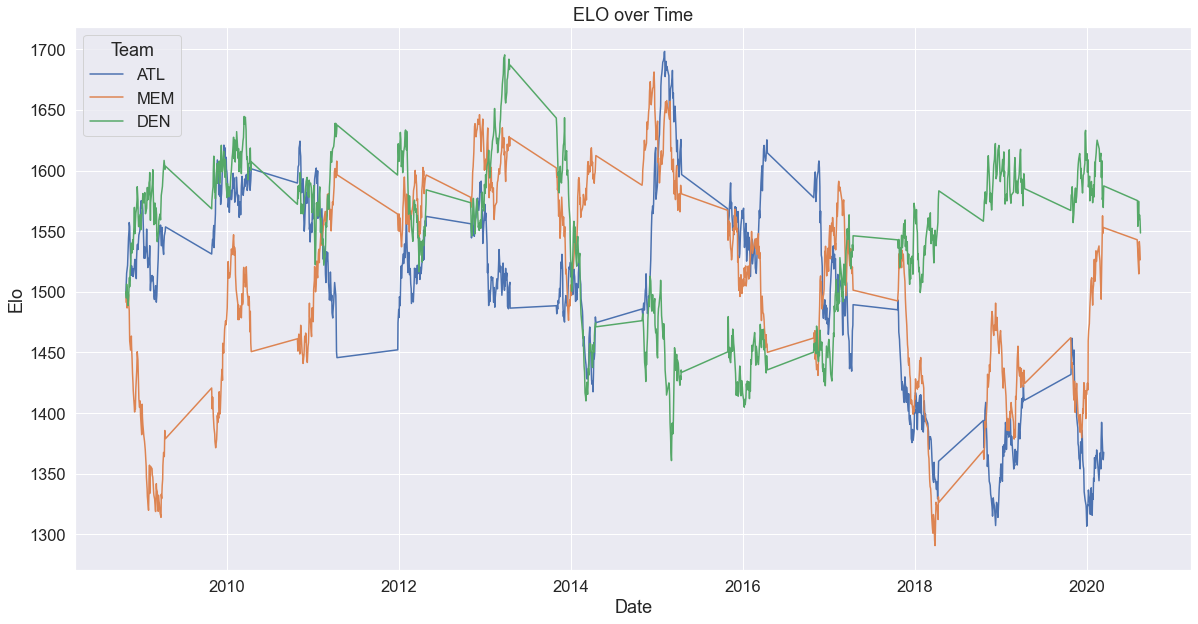

In [30]:
#Review ELO data in visual medium throughout analysis period

%matplotlib inline
import random

def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

elos = teams_elo_df['Elo'].values
plt.figure(figsize=(20,10))
sample_teams = random.sample(list(teams), k=3)
sns.set(font_scale=1.5)
sampled_data = teams_elo_df.loc[teams_elo_df['Team'].isin(sample_teams)]
sns.lineplot(data=sampled_data, x='Date', y='Elo', hue='Team')
plt.title("ELO over Time")

# 2.2 Recent Team Performance 

Creating new values for each sample, we will take the average of each teams performance stats from the previous ten game windows. This will give us a performance data value to use for prediction. 

In [31]:
#Function that pulls data from n games from dates lesser than game date and averages the stats
def get_avg_stats(team, game_date, team_season_stats, n) :
    prior_games = team_season_stats[team_season_stats['Date'] < game_date][(team_season_stats['H_Team'] == team) | (team_season_stats['A_Team'] == team)].sort_values(by = 'Date').tail(n)
    
    home_df = prior_games.iloc[:, range(3, 53 ,2)]
    home_df.columns = [x[2:] for x in home_df.columns]
    away_df = prior_games.iloc[:, range( 4, 54, 2)]
    away_df.columns = [x[2:] for x in away_df.columns ]
    
    df = pd.concat([home_df, away_df])
    df = df[df['Team']==team]
    df.drop(columns = ['Team'], inplace = True)
    
    return df.mean()

In [32]:
#Recent Performance dataframe for team stats
recent_performance_df = pd.DataFrame()


for Season in team_stats['season'].unique():
    c1 = ['Date', 'GameID', 'season', 'H_Team', 'A_Team']
    c2 = list(team_stats.columns[14:65])
    columns = c1 + c2
    
    team_season_stats = team_stats[cleaned_team_stats['season'] == Season ].sort_values(by='Date')[columns].reset_index(drop = True)
    
    season_recent_performance = pd. DataFrame()
    
    for index, row in team_season_stats.iterrows():
        game_ID = row['GameID']
        game_date = row['Date']
        h_team = row['H_Team']
        a_team = row['A_Team']
        
        h_team_recent_performance = get_avg_stats(h_team, game_date, team_season_stats, 10)
        h_team_recent_performance.index = ['H_Last_10_gm_avg_' + x for x in h_team_recent_performance.index]
        
        a_team_recent_performance = get_avg_stats(a_team, game_date, team_season_stats, 10)
        a_team_recent_performance.index = ['A_Last_10_gm_avg_' + x for x in a_team_recent_performance.index]
        
        nrow = pd.concat([h_team_recent_performance, a_team_recent_performance], sort = False)
        nrow['GameID'] = game_ID
        
        season_recent_performance = season_recent_performance.append(nrow, ignore_index = True)
        season_recent_performance = season_recent_performance[nrow.index]
    
    recent_performance_df = pd.concat([recent_performance_df, season_recent_performance])

/var/folders/n4/x3431d_565s25yt88cgb8slc0000gp/T/ipykernel_25917/1044668817.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior_games = team_season_stats[team_season_stats['Date'] < game_date][(team_season_stats['H_Team'] == team) | (team_season_stats['A_Team'] == team)].sort_values(by = 'Date').tail(n)


In [33]:
recent_performance_df = recent_performance_df.dropna()

# 2.3 Combing Performance Average Stats to Team Stats DF

By combining the performance stats and the team stats, we can build a final performance dataframe

In [34]:
final_team_stats = team_stats.iloc[0 :, [0,1,2,3,6,14,15]].merge(elo_df.drop(columns=['H_Team', 'A_Team']), on = 'GameID') \
.merge(recent_performance_df, on = 'GameID')

final_team_stats = final_team_stats.dropna()

In [35]:
#Merge and organize
h_cols = final_team_stats.columns[final_team_stats.columns.str.startswith('H_')]

team_df = final_team_stats.iloc[0:, [0,1,2,3,4,9,10]].drop(columns = ['H_Team', 'A_Team'])
team_df_h = team_df.drop(columns=team_df.columns[team_df.columns.str.startswith('A_')])
team_df_a = team_df.drop(columns=team_df.columns[team_df.columns.str.startswith('H_')])

recent_perf_h = recent_performance_df.drop(columns = recent_performance_df.columns\
                           [recent_performance_df.columns.str.startswith('A_')])
recent_perf_a = recent_performance_df.drop(columns = recent_performance_df.columns\
                           [recent_performance_df.columns.str.startswith('H_')])

#Combining team_df, teams_elo_df, and recent_perf to create a team by team df. 
tbt_h = team_df_h.merge(teams_elo_df[teams_elo_df.Where_Played == 'Home'], on = 'GameID') \
.merge(recent_perf_h, on ='GameID')

tbt_a = team_df_a.merge(teams_elo_df[teams_elo_df.Where_Played == 'Away'], on = 'GameID') \
.merge(recent_perf_a, on ='GameID')

#Removing 'H_' and 'A_', redundant information in our new df. _x, and _y will appear after first operator and will need to be removed

tbt_h.columns = tbt_h.columns.str.replace('H_', '')
tbt_h.columns = tbt_h.columns.str.replace('_x', '')
tbt_h.columns = tbt_h.columns.str.replace('_y', '')
tbt_a.columns = tbt_a.columns.str.replace('A_', '')
tbt_a.columns = tbt_a.columns.str.replace('_x', '')
tbt_a.columns = tbt_a.columns.str.replace('_y', '')
#Removing any duplicate columns 
tbt_h = tbt_h.loc[:, ~tbt_h.columns.duplicated()]
tbt_a = tbt_a.loc[:, ~tbt_a.columns.duplicated()]

#concating the away and home team by team dataframes by index
final_team_performances_df = pd.concat([tbt_h, tbt_a]).sort_index(axis=0).reset_index().drop(columns=['index'])

In [36]:
final_team_performances_df.head()

Date       GameID   season  Team_Elo_After Team          Elo  \
0 2008-10-30  20081030PHO  2008-09     1493.762230  PHO  1508.416895   
1 2008-10-30  20081030PHO  2008-09     1523.071560  NOP  1508.416895   
2 2008-10-31  20081031PHI  2008-09     1505.383439  PHI  1486.830104   
3 2008-10-31  20081031PHI  2008-09     1487.104521  NYK  1505.657856   
4 2008-10-31  20081031TOR  2008-09     1517.801701  TOR  1513.169896   

  Where_Played  Last_10_gm_avg_PTS  Last_10_gm_avg_AST  Last_10_gm_avg_TO  \
0         Home               103.0                24.0               10.0   
1         Away               108.0                23.0               13.0   
2         Home                84.0                15.0               17.0   
3         Away               120.0                27.0               15.0   
4         Home                95.0                24.0                9.0   

   ...  Last_10_gm_avg_FTMade  Last_10_gm_avg_ORB  Last_10_gm_avg_DRB  \
0  ...                   19.0                 9.0                30.0   
1  ...                   19.0                 8.0                34.0   
2  ...                   21.0                23.0                33.0   
3  ...                   27.0                14.0                32.0   
4  ...                   13.0                10.0                23.0   

   Last_10_gm_avg_TRB  Last_10_gm_avg_PTS10  Last_10_gm_avg_Ortg  \
0                39.0                   0.0                116.6   
1                42.0                   0.0                112.6   
2                56.0                   0.0                 99.8   
3                46.0                   0.0                116.2   
4                33.0                   0.0                112.8   

   Last_10_gm_avg_Drtg  Last_10_gm_avg_FGMissed  Last_10_gm_avg_2PMissed  \
0                110.9                     40.0                     31.0   
1                107.4                     41.0                     31.0   
2                112.8                     55.0                     40.0   
3                111.4                     45.0                     29.0   
4                 99.8                     45.0                     39.0   

   Last_10_gm_avg_3PMissed  
0                      9.0  
1                     10.0  
2                     15.0  
3                     16.0  
4                      6.0  

[5 rows x 31 columns]

# 2.4 Label Column and Save to CSV

Creating a final "Label" that differentiates between winners and losers for our evaluation. 

In [37]:
final_team_stats['Label'] = [1 if x > 0 else 0 for x in final_team_stats['H_PTS'] - final_team_stats['A_PTS']]

final_team_stats.drop(columns = ['H_PTS', 'A_PTS'], inplace = True)
final_team_stats = final_team_stats.dropna()
final_team_stats.reset_index(drop= True, inplace = True)

combined_df = final_team_stats
final_team_stats.head()

Date       GameID   season H_Team A_Team H_Team_Elo_Before  \
0 2008-10-30  20081030PHO  2008-09    PHO    NOP       1508.416895   
1 2008-10-31  20081031PHI  2008-09    PHI    NYK       1486.830104   
2 2008-10-31  20081031TOR  2008-09    TOR    GSW       1513.169896   
3 2008-10-31  20081031MIA  2008-09    MIA    SAC       1494.342144   
4 2008-10-31  20081031BOS  2008-09    BOS    CHI       1505.657856   

  A_Team_Elo_Before  H_Team_Elo_After  A_Team_Elo_After  H_Last_10_gm_avg_PTS  \
0       1508.416895       1493.762230       1523.071560                 103.0   
1       1505.657856       1505.383439       1487.104521                  84.0   
2       1491.583105       1517.801701       1486.951300                  95.0   
3       1496.115314       1510.314181       1480.143277                 115.0   
4         1509.8509       1517.162690       1498.346066                  90.0   

   ...  A_Last_10_gm_avg_ORB  A_Last_10_gm_avg_DRB  A_Last_10_gm_avg_TRB  \
0  ...                   8.0                  34.0                  42.0   
1  ...                  14.0                  32.0                  46.0   
2  ...                  11.0                  28.0                  39.0   
3  ...                   9.0                  36.0                  45.0   
4  ...                  14.0                  26.0                  40.0   

   A_Last_10_gm_avg_PTS10  A_Last_10_gm_avg_Ortg  A_Last_10_gm_avg_Drtg  \
0                     0.0                  112.6                  107.4   
1                     0.0                  116.2                  111.4   
2                     0.0                  107.4                  112.6   
3                     0.0                  101.4                  103.5   
4                     0.0                  120.3                  105.8   

   A_Last_10_gm_avg_FGMissed  A_Last_10_gm_avg_2PMissed  \
0                       41.0                       31.0   
1                       45.0                       29.0   
2                       46.0                       32.0   
3                       44.0                       32.0   
4                       34.0                       27.0   

   A_Last_10_gm_avg_3PMissed  Label  
0                       10.0      0  
1                       16.0      1  
2                       14.0      1  
3                       12.0      1  
4                        7.0      1  

[5 rows x 58 columns]

In [38]:
final_team_stats.to_csv('final_team_stats.csv')

# 2.5 Creating Recent Player Performance DataFrame

Like the average team stats per 10 games, we will do the same for the player stats for their previous 10 games

In [39]:
#Read in player stats
#Create a season column so games can correlate to the NBA season they were played in.

player_stats = pd.read_csv('Cleaned_Player_Stats.csv', index_col = 0)
player_stats = player_stats.sort_values(by='Date').reset_index(drop = True)
IDseason = team_stats[['season', 'GameID']].drop_duplicates()
player_stats.rename(columns={'gameID': 'GameID'}, inplace=True)
IDseason.head()

season       GameID
0  2008-09  20081028BOS
1  2008-09  20081028CHI
2  2008-09  20081028LAL
3  2008-09  20081029PHI
4  2008-09  20081029WAS

In [40]:
player_stats = pd.merge(player_stats, IDseason , left_on='GameID', right_on='GameID', how = 'left')
player_stats.head()

GameID              Player                 Team         Against  \
0  20081028BOS        LeBron James  Cleveland Cavaliers  Boston Celtics   
1  20081028BOS  Zydrunas Ilgauskas  Cleveland Cavaliers  Boston Celtics   
2  20081028BOS         Ben Wallace  Cleveland Cavaliers  Boston Celtics   
3  20081028BOS    Anderson Varejão  Cleveland Cavaliers  Boston Celtics   
4  20081028BOS       Daniel Gibson  Cleveland Cavaliers  Boston Celtics   

         Date     MP   FG   FGA   FGM   3P  ...  DRB  TRB  AST  STL  BLK  TOV  \
0  2008-10-28  36.00  9.0  21.0  12.0  0.0  ...  6.0  7.0  6.0  2.0  1.0  3.0   
1  2008-10-28  30.24  3.0   5.0   2.0  0.0  ...  5.0  8.0  1.0  0.0  0.0  4.0   
2  2008-10-28  19.03  1.0   1.0   0.0  0.0  ...  4.0  4.0  0.0  0.0  1.0  1.0   
3  2008-10-28  26.09  3.0   6.0   3.0  0.0  ...  5.0  9.0  1.0  3.0  0.0  2.0   
4  2008-10-28  22.38  2.0   8.0   6.0  0.0  ...  3.0  3.0  3.0  0.0  0.0  0.0   

    PF   PTS  Teamabbr   season  
0  4.0  22.0       CLE  2008-09  
1  3.0  15.0       CLE  2008-09  
2  2.0   2.0       CLE  2008-09  
3  2.0   9.0       CLE  2008-09  
4  1.0   6.0       CLE  2008-09  

[5 rows x 25 columns]

In [41]:
#function for averaging player stats of the previous 10 games
def rolling_average_last_n_games(n):
    player_stats_recent = pd.DataFrame()
    
    for season in player_stats['season'].unique():
        season_stats = player_stats[player_stats['season']==season]
        
        for player in season_stats['Player'].unique():
            player_performance = season_stats[season_stats['Player']==player].rolling(n, min_periods=1).mean().shift(1)
            
            player_stats_recent = player_stats_recent.append(player_performance, ignore_index = False)
        
        #renaming columns to reflect 10 game avg
        player_stats_recent.columns = ['Last_' + str(n) + '_Avg_' + x for x in player_stats_recent.columns]
        #merging playerstats to playerstats_recent and at the same time removing the redundent current game avg stats.
        player_stats_recent = player_stats[['Player', 'GameID']].merge(player_stats_recent,left_index=True, right_index=True)
        
        return player_stats_recent

In [42]:
#append the last 10 game values to player recent performance dataframe
player_recent_performance = rolling_average_last_n_games(10)

player_recent_performance.tail()

Player       GameID  Last_10_Avg_MP  Last_10_Avg_FG  \
23958  Rudy Fernández  20090415POR          24.106             3.8   
23959   Nicolas Batum  20090415POR          20.826             2.5   
23960  Joel Przybilla  20090415POR          24.560             1.7   
23961     Brandon Roy  20090415POR          33.950             7.7   
23962     Steve Blake  20090415POR          32.688             3.7   

       Last_10_Avg_FGA  Last_10_Avg_FGM  Last_10_Avg_3P  Last_10_Avg_3PA  \
23958              7.9              4.1             2.3              4.7   
23959              4.8              2.3             0.9              1.7   
23960              3.4              1.7             0.0              0.0   
23961             14.9              7.2             1.3              3.2   
23962              8.7              5.0             1.7              4.1   

       Last_10_Avg_FT  Last_10_Avg_FTA  Last_10_Avg_ORB  Last_10_Avg_FTM  \
23958             1.5              2.2              0.2              0.7   
23959             0.5              0.5              1.8              0.0   
23960             1.3              1.5              2.6              0.2   
23961             5.1              6.5              1.1              1.4   
23962             0.5              0.7              0.4              0.2   

       Last_10_Avg_DRB  Last_10_Avg_TRB  Last_10_Avg_AST  Last_10_Avg_STL  \
23958              1.8              2.0              1.7              1.4   
23959              1.2              3.0              0.8              0.5   
23960              7.3              9.9              0.4              0.4   
23961              3.6              4.7              5.2              1.3   
23962              3.1              3.5              5.4              1.0   

       Last_10_Avg_BLK  Last_10_Avg_TOV  Last_10_Avg_PF  Last_10_Avg_PTS  
23958              0.1              0.7             1.5             11.4  
23959              0.4              0.3             1.5              6.4  
23960              1.2              1.1             2.3              4.7  
23961              0.4              2.3             1.5             21.8  
23962              0.1              1.6             2.1              9.6

# 2.6 Player Season Average Performance

Having completed their recent average, we will also compare it to their season average, as players play, their performances do shift, but most of the time they will revert to average.

In [43]:
avg_season_stats = pd.DataFrame()

for season in player_stats['season'].unique():
    season_player_stats = player_stats[player_stats['season']==season]
    for player in season_player_stats['Player'].unique():
        #.expanding() similar to rolling, but rolling sets window length, where expanding is set to variable that changes its window size depending on variable
        player_season_avg = season_player_stats[season_player_stats['Player']==player].expanding().mean().shift(1)
        
        avg_season_stats = avg_season_stats.append(player_season_avg, ignore_index = False)
    
avg_season_stats.columns = ['Avg_season_' + x for x in avg_season_stats.columns]
avg_season_stats = player_stats.iloc[:, [0, 1, 2, 3, 21, 22]].merge(avg_season_stats, left_index = True, right_index=True)


In [44]:
avg_season_stats.drop(columns = 'GameID', inplace = True)
avg_season_stats.tail()

Player             Team             Against   PF   PTS  \
291003     Chris Clemons  Houston Rockets  Philadelphia 76ers  4.0   4.0   
291004  Luc Mbah a Moute  Houston Rockets  Philadelphia 76ers  0.0   3.0   
291005     Austin Rivers  Houston Rockets  Philadelphia 76ers  0.0   1.0   
291006      James Harden  Houston Rockets  Philadelphia 76ers  1.0  27.0   
291007      Ben McLemore  Houston Rockets  Philadelphia 76ers  0.0   3.0   

        Avg_season_MP  Avg_season_FG  Avg_season_FGA  Avg_season_FGM  \
291003       8.335625       1.718750        4.218750        2.500000   
291004       5.205000       0.500000        1.000000        0.500000   
291005      23.405075       3.149254        7.447761        4.298507   
291006      36.479851       9.895522       22.358209       12.462687   
291007      22.749714       3.442857        7.728571        4.285714   

        Avg_season_3P  ...  Avg_season_ORB  Avg_season_FTM  Avg_season_DRB  \
291003       1.156250  ...        0.125000        0.031250        0.781250   
291004       0.000000  ...        0.500000        0.000000        0.000000   
291005       1.432836  ...        0.402985        0.477612        2.194030   
291006       4.402985  ...        1.044776        1.611940        5.567164   
291007       2.571429  ...        0.300000        0.242857        1.914286   

        Avg_season_TRB  Avg_season_AST  Avg_season_STL  Avg_season_BLK  \
291003        0.906250        0.718750        0.250000        0.156250   
291004        0.500000        0.000000        1.000000        0.000000   
291005        2.597015        1.686567        0.716418        0.149254   
291006        6.611940        7.492537        1.850746        0.865672   
291007        2.214286        0.814286        0.628571        0.228571   

        Avg_season_TOV  Avg_season_PF  Avg_season_PTS  
291003        0.562500       0.687500        4.906250  
291004        0.500000       0.000000        1.000000  
291005        0.731343       1.925373        8.880597  
291006        4.492537       3.373134       34.447761  
291007        0.714286       2.214286       10.171429  

[5 rows x 23 columns]

# 2.7 Combine Player Features into Final Player Stats and Save CSV

In [45]:
final_player_stats = avg_season_stats.merge(player_recent_performance.drop(columns=['GameID','Player']), left_index=True, right_index=True)
final_player_stats = final_player_stats.dropna()

In [46]:
final_player_stats.to_csv('final_player_stats.csv')

# 2.8 Final Data Displays

In [47]:
final_team_stats

Date       GameID   season H_Team A_Team H_Team_Elo_Before  \
0     2008-10-30  20081030PHO  2008-09    PHO    NOP       1508.416895   
1     2008-10-31  20081031PHI  2008-09    PHI    NYK       1486.830104   
2     2008-10-31  20081031TOR  2008-09    TOR    GSW       1513.169896   
3     2008-10-31  20081031MIA  2008-09    MIA    SAC       1494.342144   
4     2008-10-31  20081031BOS  2008-09    BOS    CHI       1505.657856   
...          ...          ...      ...    ...    ...               ...   
14134 2020-08-13  20200813BKN  2019-20    BKN    POR       1518.795548   
14135 2020-08-14  20200814TOR  2019-20    TOR    DEN       1683.137229   
14136 2020-08-14  20200814IND  2019-20    IND    MIA       1563.263075   
14137 2020-08-14  20200814LAC  2019-20    LAC    OKC       1642.593683   
14138 2020-08-14  20200814HOU  2019-20    HOU    PHI       1569.491973   

      A_Team_Elo_Before  H_Team_Elo_After  A_Team_Elo_After  \
0           1508.416895       1493.762230       1523.071560   
1           1505.657856       1505.383439       1487.104521   
2           1491.583105       1517.801701       1486.951300   
3           1496.115314       1510.314181       1480.143277   
4             1509.8509       1517.162690       1498.346066   
...                 ...               ...               ...   
14134        1528.36943       1514.104890       1533.060088   
14135       1548.559957       1687.014564       1544.682622   
14136       1566.395438       1575.196348       1554.462166   
14137       1586.866995       1646.563430       1582.897248   
14138       1533.078029       1534.811696       1567.758306   

       H_Last_10_gm_avg_PTS  ...  A_Last_10_gm_avg_ORB  A_Last_10_gm_avg_DRB  \
0                     103.0  ...                   8.0                  34.0   
1                      84.0  ...                  14.0                  32.0   
2                      95.0  ...                  11.0                  28.0   
3                     115.0  ...                   9.0                  36.0   
4                      90.0  ...                  14.0                  26.0   
...                     ...  ...                   ...                   ...   
14134                 117.9  ...                  10.2                  33.4   
14135                 111.0  ...                   9.6                  32.8   
14136                 110.4  ...                   7.8                  34.5   
14137                 118.8  ...                   8.1                  33.9   
14138                 114.8  ...                  12.1                  32.6   

       A_Last_10_gm_avg_TRB  A_Last_10_gm_avg_PTS10  A_Last_10_gm_avg_Ortg  \
0                      42.0                     0.0                 112.60   
1                      46.0                     0.0                 116.20   
2                      39.0                     0.0                 107.40   
3                      45.0                     0.0                 101.40   
4                      40.0                     0.0                 120.30   
...                     ...                     ...                    ...   
14134                  43.6                     0.0                 121.65   
14135                  42.4                     0.0                 115.95   
14136                  42.3                     0.0                 111.90   
14137                  42.0                     0.0                 110.86   
14138                  44.7                     0.0                 120.71   

       A_Last_10_gm_avg_Drtg  A_Last_10_gm_avg_FGMissed  \
0                     107.40                       41.0   
1                     111.40                       45.0   
2                     112.60                       46.0   
3                     103.50                       44.0   
4                     105.80                       34.0   
...                      ...                        ...   
14134                 120.32                       47.3

In [48]:
final_player_stats

Player                    Team                Against   PF  \
120          Dan Gadzuric         Milwaukee Bucks  Oklahoma City Thunder  1.0   
157     Richard Jefferson         Milwaukee Bucks  Oklahoma City Thunder  3.0   
158    Charlie Villanueva         Milwaukee Bucks  Oklahoma City Thunder  6.0   
159          Michael Redd         Milwaukee Bucks  Oklahoma City Thunder  0.0   
160          Andrew Bogut         Milwaukee Bucks  Oklahoma City Thunder  4.0   
...                   ...                     ...                    ...  ...   
23958      Rudy Fernández  Portland Trail Blazers         Denver Nuggets  4.0   
23959       Nicolas Batum  Portland Trail Blazers         Denver Nuggets  2.0   
23960      Joel Przybilla  Portland Trail Blazers         Denver Nuggets  2.0   
23961         Brandon Roy  Portland Trail Blazers         Denver Nuggets  1.0   
23962         Steve Blake  Portland Trail Blazers         Denver Nuggets  1.0   

        PTS  Avg_season_MP  Avg_season_FG  Avg_season_FGA  Avg_season_FGM  \
120     5.0      14.330000       3.000000        3.000000        0.000000   
157    20.0      38.190000       5.000000       17.000000       12.000000   
158    20.0       8.470000       1.000000        5.000000        4.000000   
159    20.0      38.280000      10.000000       19.000000        9.000000   
160    14.0      25.570000       4.000000        4.000000        0.000000   
...     ...            ...            ...             ...             ...   
23958  18.0      25.091081       3.364865        7.959459        4.594595   
23959   3.0      18.193600       2.040000        4.533333        2.493333   
23960   6.0      23.615256       2.012821        3.256410        1.243590   
23961   6.0      36.825405       8.175676       16.824324        8.648649   
23962   9.0      31.307538       3.969231        9.276923        5.307692   

       Avg_season_3P  ...  Last_10_Avg_ORB  Last_10_Avg_FTM  Last_10_Avg_DRB  \
120         0.000000  ...              2.0              0.0              1.0   
157         2.000000  ...              0.0              1.0              4.0   
158         0.000000  ...              2.0              0.0              1.0   
159         4.000000  ...              1.0              2.0              1.0   
160         0.000000  ...              3.0              1.0              4.0   
...              ...  ...              ...              ...              ...   
23958       1.959459  ...              0.2              0.7              1.8   
23959       0.786667  ...              1.8              0.0              1.2   
23960       0.000000  ...              2.6              0.2              7.3   
23961       1.081081  ...              1.1              1.4              3.6   
23962       2.061538  ...              0.4              0.2              3.1   

       Last_10_Avg_TRB  Last_10_Avg_AST  Last_10_Avg_STL  Last_10_Avg_BLK  \
120                3.0              1.0              1.0              0.0   
157                4.0              2.0              0.0              0.0   
158                3.0              1.0              0.0              0.0   
159                2.0              1.0              1.0              0.0   
160                7.0              0.0              1.0              1.0   
...                ...              ...              ...              ...   
23958              2.0              1.7              1.4              0.1   
23959              3.0              0.8              0.5              0.4   
23960              9.9              0.4              0.4              1.2   
23961              4.7              5.2              1.3              0.4   
23962              3.5              5.4              1.0              0.1   

       Last_10_Avg_TOV  Last_10_Avg_PF  Last_10_Avg_PTS  
120                2.0             2.0              6.0  
157                2.0             4.0             15.0  
158                1.0             3.0              4.0  
159

In [49]:
final_team_performances_df

Date       GameID   season  Team_Elo_After Team          Elo  \
0     2008-10-30  20081030PHO  2008-09     1493.762230  PHO  1508.416895   
1     2008-10-30  20081030PHO  2008-09     1523.071560  NOP  1508.416895   
2     2008-10-31  20081031PHI  2008-09     1505.383439  PHI  1486.830104   
3     2008-10-31  20081031PHI  2008-09     1487.104521  NYK  1505.657856   
4     2008-10-31  20081031TOR  2008-09     1517.801701  TOR  1513.169896   
...          ...          ...      ...             ...  ...          ...   
28273 2020-08-14  20200814IND  2019-20     1575.196348  IND  1563.263075   
28274 2020-08-14  20200814LAC  2019-20     1582.897248  OKC  1586.866995   
28275 2020-08-14  20200814LAC  2019-20     1646.563430  LAC  1642.593683   
28276 2020-08-14  20200814HOU  2019-20     1534.811696  HOU  1569.491973   
28277 2020-08-14  20200814HOU  2019-20     1567.758306  PHI  1533.078029   

      Where_Played  Last_10_gm_avg_PTS  Last_10_gm_avg_AST  Last_10_gm_avg_TO  \
0             Home               103.0                24.0               10.0   
1             Away               108.0                23.0               13.0   
2             Home                84.0                15.0               17.0   
3             Away               120.0                27.0               15.0   
4             Home                95.0                24.0                9.0   
...            ...                 ...                 ...                ...   
28273         Home               110.4                24.0               13.6   
28274         Away               110.3                21.1               14.0   
28275         Home               118.8                22.1               11.6   
28276         Home               114.8                22.4               15.4   
28277         Away               119.0                25.2               13.3   

       ...  Last_10_gm_avg_FTMade  Last_10_gm_avg_ORB  Last_10_gm_avg_DRB  \
0      ...                   19.0                 9.0                30.0   
1      ...                   19.0                 8.0                34.0   
2      ...                   21.0                23.0                33.0   
3      ...                   27.0                14.0                32.0   
4      ...                   13.0                10.0                23.0   
...    ...                    ...                 ...                 ...   
28273  ...                   15.5                 7.7                34.9   
28274  ...                   19.9                 8.1                33.9   
28275  ...                   21.7                 8.9                36.5   
28276  ...                   21.3                 6.9                33.0   
28277  ...                   19.8                12.1                32.6   

       Last_10_gm_avg_TRB  Last_10_gm_avg_PTS10  Last_10_gm_avg_Ortg  \
0                    39.0                   0.0               116.60   
1                    42.0                   0.0               112.60   
2                    56.0                   0.0                99.80   
3                    46.0                   0.0               116.20   
4                    33.0                   0.0               112.80   
...                   ...                   ...                  ...   
28273                42.6                   0.0               109.28   
28274                42.0                   0.0               110.86   
28275                45.4                   0.0               120.43   
28276                39.9                   0.0               108.75   
28277                44.7                   0.0               120.71   

       Last_10_gm_avg_Drtg  Last_10_gm_avg_FGMissed  Last_10_gm_avg_2PMissed  \
0                   110.90                     40.0                     31.0   
1                   107.40                     41.0                     31.0   
2                   112.80                     55.0                     40.0   
3               

# Section 3: Exploratory Data Analysis

In this section we will first compare stats between winners and losers.

In [50]:
#Adding win columns for the team_final_performances_df similar to final_team_stats

labels = [] 

#choose the specific row
for i, row in combined_df.iterrows():
    game_id = row['GameID']
    win = row['Label']
    tp_row = final_team_performances_df.loc[final_team_performances_df['GameID']==game_id]
    #iterate through each specific row to see if the home team won or lose, append to labels list
    for j, r in tp_row.iterrows(): 
        if r['Where_Played'] == 'Home' and win==0:
            labels.append(0)
        elif r['Where_Played'] == 'Away' and win==1:
            labels.append(0)
        else:
            labels.append(1)
#set win column to our labels list             
final_team_performances_df['Win'] = labels

final_team_performances_df['Date'] = pd.to_datetime(final_team_performances_df['Date'])
final_team_performances_df.sort_values(by=['Date'], inplace=True, ascending=True)

final_team_performances_df.head()

Date       GameID   season  Team_Elo_After Team          Elo  \
0  2008-10-30  20081030PHO  2008-09     1493.762230  PHO  1508.416895   
1  2008-10-30  20081030PHO  2008-09     1523.071560  NOP  1508.416895   
15 2008-10-31  20081031POR  2008-09     1490.146208  POR  1486.830715   
13 2008-10-31  20081031LAC  2008-09     1506.380230  DEN  1494.915382   
12 2008-10-31  20081031LAC  2008-09     1458.693740  LAC  1470.158588   

   Where_Played  Last_10_gm_avg_PTS  Last_10_gm_avg_AST  Last_10_gm_avg_TO  \
0          Home               103.0                24.0               10.0   
1          Away               108.0                23.0               13.0   
15         Home                76.0                19.0               12.0   
13         Away                94.0                17.0               13.0   
12         Home                79.0                24.0               18.0   

    ...  Last_10_gm_avg_ORB  Last_10_gm_avg_DRB  Last_10_gm_avg_TRB  \
0   ...                 9.0                30.0                39.0   
1   ...                 8.0                34.0                42.0   
15  ...                13.0                31.0                44.0   
13  ...                 7.0                28.0                35.0   
12  ...                10.0                22.0                32.0   

    Last_10_gm_avg_PTS10  Last_10_gm_avg_Ortg  Last_10_gm_avg_Drtg  \
0                    0.0                116.6                110.9   
1                    0.0                112.6                107.4   
15                   0.0                 85.3                107.7   
13                   0.0                100.8                105.1   
12                   0.0                 84.4                125.0   

    Last_10_gm_avg_FGMissed  Last_10_gm_avg_2PMissed  Last_10_gm_avg_3PMissed  \
0                      40.0                     31.0                      9.0   
1                      41.0                     31.0                     10.0   
15                     55.0                     41.0                     14.0   
13                     41.0                     32.0                      9.0   
12                     48.0                     31.0                     17.0   

    Win  
0     0  
1     1  
15    1  
13    1  
12    0  

[5 rows x 32 columns]

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


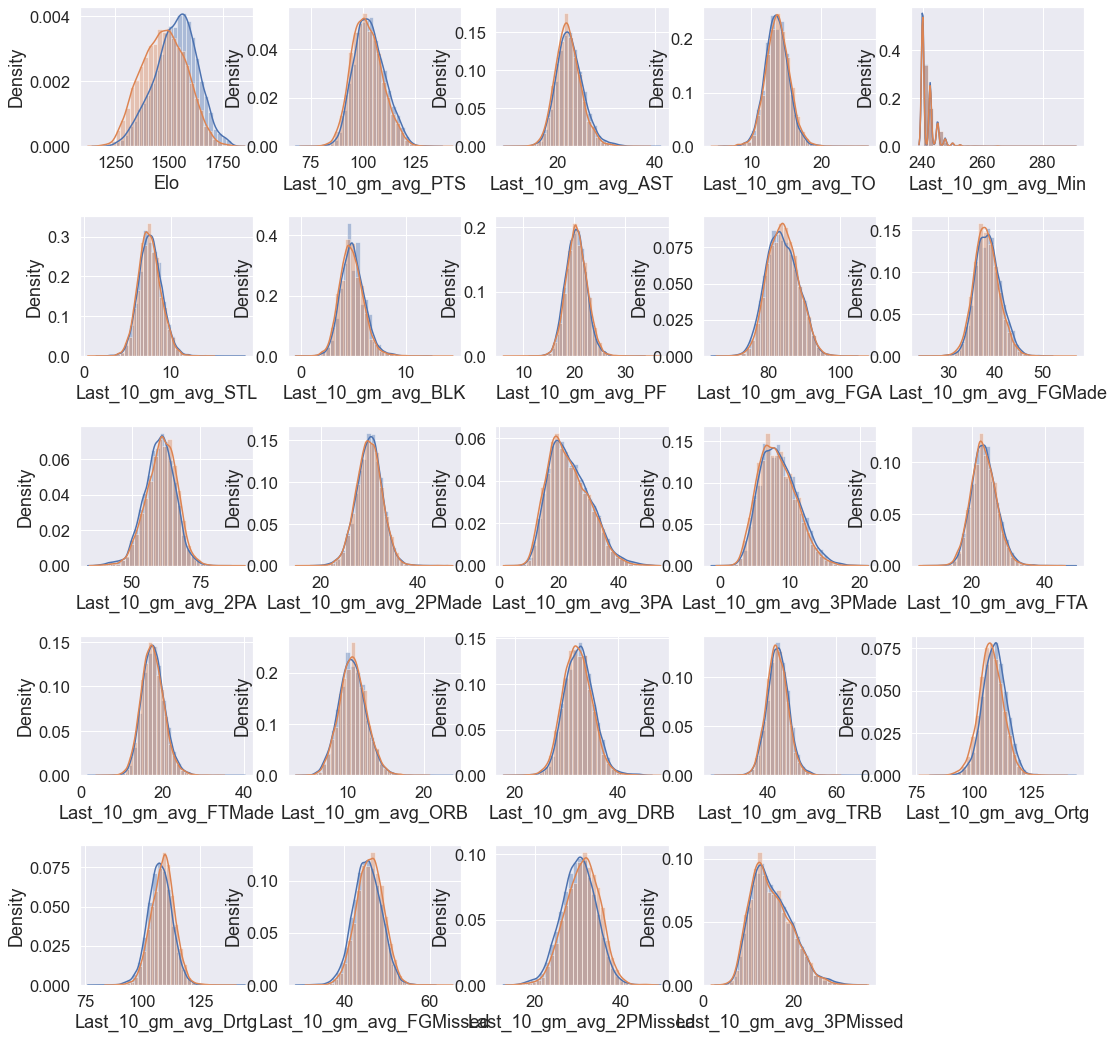

In [51]:
#Separate and Review Performance Data According to Winners and Losers
winners = final_team_performances_df[final_team_performances_df['Win']==1]
losers = final_team_performances_df[final_team_performances_df['Win']==0]

cols = ['Elo','Last_10_gm_avg_PTS', 'Last_10_gm_avg_AST',
       'Last_10_gm_avg_TO', 'Last_10_gm_avg_Min', 'Last_10_gm_avg_STL',
       'Last_10_gm_avg_BLK', 'Last_10_gm_avg_PF', 'Last_10_gm_avg_FGA',
       'Last_10_gm_avg_FGMade', 'Last_10_gm_avg_2PA', 'Last_10_gm_avg_2PMade',
       'Last_10_gm_avg_3PA', 'Last_10_gm_avg_3PMade', 'Last_10_gm_avg_FTA',
       'Last_10_gm_avg_FTMade', 'Last_10_gm_avg_ORB', 'Last_10_gm_avg_DRB',
       'Last_10_gm_avg_TRB', 'Last_10_gm_avg_Ortg',
       'Last_10_gm_avg_Drtg', 'Last_10_gm_avg_FGMissed',
       'Last_10_gm_avg_2PMissed', 'Last_10_gm_avg_3PMissed']

windata=winners[cols]
losedata=losers[cols]


fig = plt.figure()
j = 1 
fig.set_size_inches(18, 18)

for i in windata.columns:
    ax = fig.add_subplot(5, 5, j)
    sns.distplot(a=windata[i], bins=30, hist=True, ax=ax)
    sns.distplot(a=losedata[i], bins=30, hist=True, ax=ax)
    j += 1

fig.subplots_adjust(hspace=.5)
plt.show()

Comparing statistics between winners and losers, it's clear that the ELO has a strong correlation for differentiating the two. Another stat that showed good differentiation is Offensive rating (scoring per 100 possession), and defensive rating (Stls*Blocks+Opponent Possession Differential). These features summarize the teams offensive and defensive efficiencies, and makes sense that they show some correlation to differentiating winners and losers.

We will explore Player Efficiency Ratings and see whether that would support our above hypothesis. 

## 3.2 Exploring ELO Density through the NBA

Exploring the ELO rankings throughout the NBA on a per-season basis, this can give us some ideas how the teams strengths are distributed thoughout the league. Seasons that contain skewered data will most likely imply that team strength are inbalanced. 

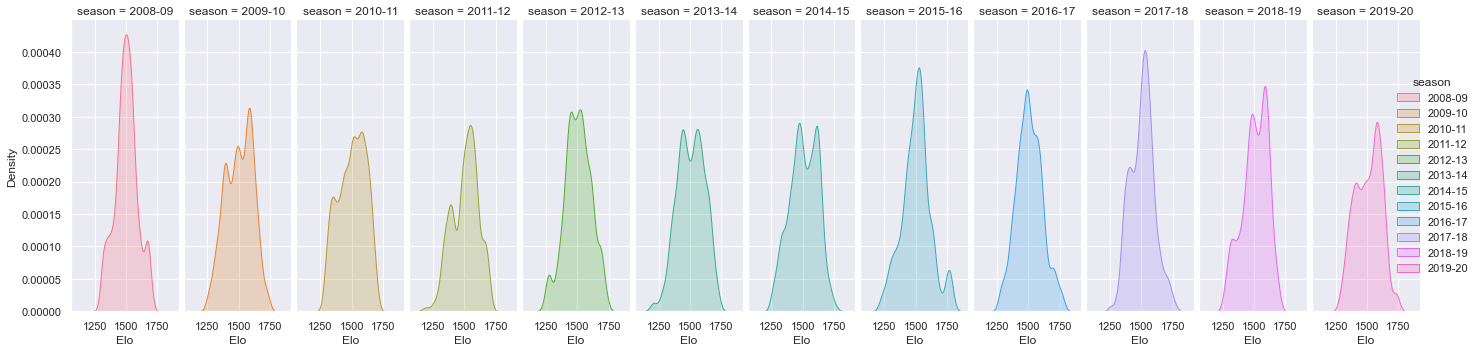

In [110]:
%matplotlib inline

#Flexibly plot a univariate distribution of observations. https://seaborn.pydata.org/generated/seaborn.distplot.html
g = sns.displot(final_team_performances_df, x='Elo', hue='season', col='season', kind ='kde', fill = True, height = 5, aspect = .7)
g.fig.set_size_inches(20,5)

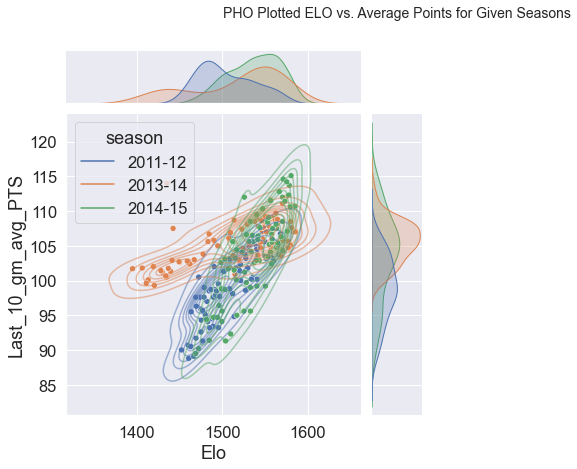

In [53]:
#create dataframe of just the randomly chosen teams
random_team = random.choice(teams)
data = final_team_performances_df[final_team_performances_df['Team']==random_team]
random_seasons = np.random.choice(list(set(final_team_performances_df['season'].values)), size=3, replace= False)
data=data[data['season'].isin(random_seasons)]

#plot ELO vs average points we can see how relevant the two variables are together. 
#seaborn.jointplot - Draw a plot of two variables with bivariate and univariate graphs.
graph = sns.jointplot(data = data, x='Elo', y='Last_10_gm_avg_PTS', hue='season', height = 6)
plt.title('{} Plotted ELO vs. Average Points for Given Seasons'.format(random_team), y=1.3, fontsize = 14)
graph.plot_joint(sns.kdeplot, alpha=0.5)

The plot shows consistently a positive correlation incating the higher the teams avg points over the 10 game window the higher their reflective ELO. For some teams, we can see that later seasons the teams tend to have higher scoring averages. 

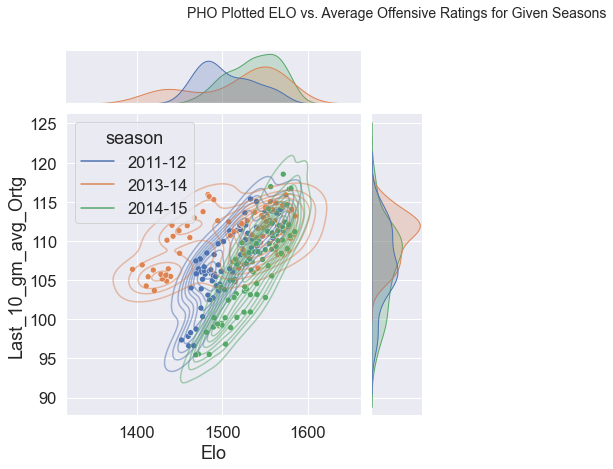

In [54]:
#Plot ELO vs. Offensive Rating
graph = sns.jointplot(data = data, x='Elo', y='Last_10_gm_avg_Ortg', hue='season', height = 6)
plt.title('{} Plotted ELO vs. Average Offensive Ratings for Given Seasons'.format(random_team), y=1.3, fontsize = 14)
graph.plot_joint(sns.kdeplot, alpha=0.5)

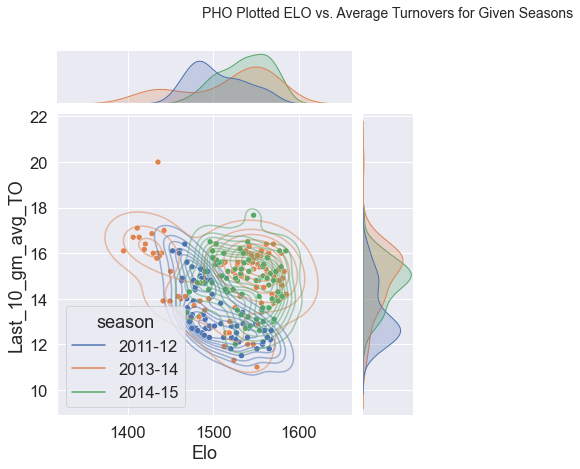

In [55]:
#Hypothesis: What about other stats such as Turnovers made vs. ELO
graph = sns.jointplot(data = data, x='Elo', y='Last_10_gm_avg_TO', hue='season', height = 6)
plt.title('{} Plotted ELO vs. Average Turnovers for Given Seasons'.format(random_team), y=1.3, fontsize = 14)
graph.plot_joint(sns.kdeplot, alpha=0.5)

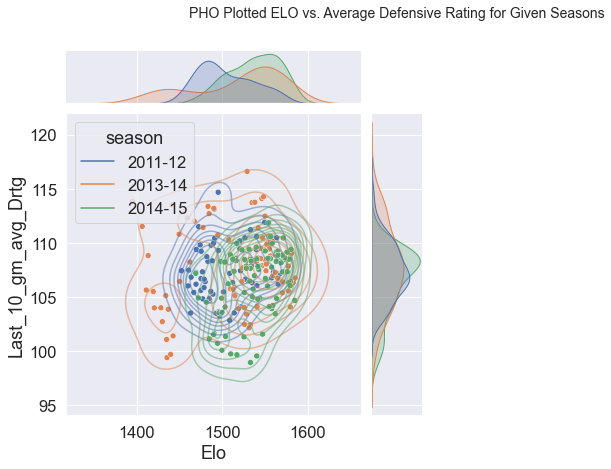

In [56]:
graph = sns.jointplot(data = data, x='Elo', y='Last_10_gm_avg_Drtg', hue='season', height = 6)
plt.title('{} Plotted ELO vs. Average Defensive Rating for Given Seasons'.format(random_team), y=1.3, fontsize = 14)
graph.plot_joint(sns.kdeplot, alpha=0.5)

Negative stats such as turnovers (mistakes) generally do reflect negatively, the lower the negative stat the higher the ELO rating. However, similar to Defensive rating, defensive stats correlation behaviour isn't as obvious as PTS vs. ELO, or the Offensive rating vs. ELO.

This could be summarize such that such ELO is highly selective of winning stats, and the essence of winning a basketball is getting buckets. 

## 3.4 Exploring Team ELO to Team Average PER

Building on our hyposthesis that efficency ratings can be helpful or provides more insightful relationships in our data, the PER is an advanced statistic that is utilized widely in the modern NBA analysis. PER essentially rewards positive stats such as scoring, rebounding and penalizes negative stats such TOs, fouls, and missed shots. This stat would allow us to sum up each players performance and test whether the players performance efficiency helps with winning leading to high team ELO. 

https://bleacherreport.com/articles/113144-cracking-the-code-how-to-calculate-hollingers-per-without-all-the-mess

In [57]:
#building player PER
player_stats['PER_Stub'] = player_stats['FG']*85.910+player_stats['STL']*53.897+player_stats['3P']*51.757+ \
player_stats['FT']*46.845+player_stats['BLK']*39.190+player_stats['ORB']*39.19+player_stats['AST']*34.677+ \
player_stats['DRB']*14.707-player_stats['PF']*17.174-player_stats['FTM']*20.091-player_stats['FGM']*39.190- \
player_stats['TOV']*53.897

player_stats['PER'] = player_stats['PER_Stub'] * (1/ player_stats['MP'])

player_stats['PER'].describe()

count    2.909630e+05
mean              NaN
std               NaN
min              -inf
25%      5.639175e+00
50%      1.403897e+01
75%      2.240456e+01
max               inf
Name: PER, dtype: float64

In [60]:
player_stats[['MP', 'PER']][player_stats['PER']<-36].describe()

MP          PER
count  1190.000000  1190.000000
mean      1.630706         -inf
std       1.352889          NaN
min       0.000000         -inf
25%       0.520000   -78.082020
50%       1.320000   -49.802524
75%       2.317500   -40.260000
max       9.260000   -36.020221

#Mean vs. Median

We can see that due to the way the PER is calculated, players that sometime do not play many minutes and only racked up negative scores, their PER's are incredibly large in the negative direction. If we are using a Mean calculation for the team average PER, these large negative numbers will skewer the mean. Because the impact from a minutes standpoint on court is quite neglegible, it would more accurately reflect the team average performance efficiency if we used a median team PER. 

In [61]:
#Compare ELO to Team Median PER
team_per = []
opp_per = []
for i, row in data.iterrows():
    game_id = row['GameID']
    stub_rows = player_stats[player_stats['GameID']== game_id]
    team_rows = stub_rows[stub_rows['Teamabbr'] == random_team]
    opp_rows = stub_rows[stub_rows['Teamabbr'] != random_team]
    
    team_per.append(np.median(team_rows['PER'].values))
    opp_per.append(np.median(opp_rows['PER'].values))

data['MED_PER'] = team_per
data['OPP_MED_PER'] = opp_per

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


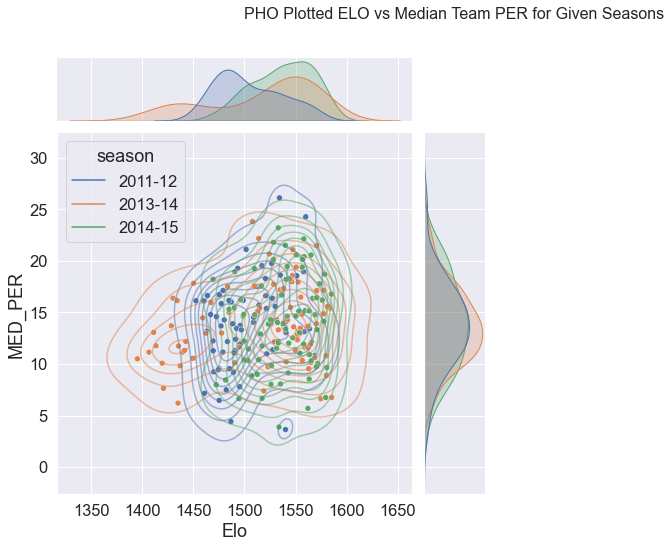

In [62]:
g = sns.jointplot(data = data, x="Elo", y="MED_PER", hue="season", height=7)
plt.title("{} Plotted ELO vs Median Team PER for Given Seasons".format(random_team), y=1.3, fontsize = 16)
g.plot_joint(sns.kdeplot, alpha=0.5)

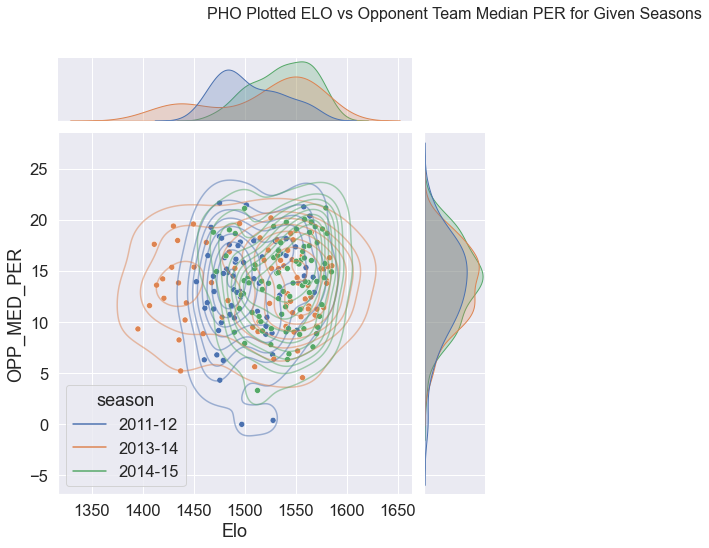

In [63]:
g = sns.jointplot(data = data, x="Elo", y="OPP_MED_PER", hue="season", height=7)
plt.title("{} Plotted ELO vs Opponent Team Median PER for Given Seasons".format(random_team), y=1.3, fontsize = 16)
g.plot_joint(sns.kdeplot, alpha=0.5)

Unlike our hypothesis where efficiency statistics being good features, we can see that the median PER doesn't exactly show a strong correlation with ELO.

*Potential area for future analysis, gather additional data that describes the individual players offensive rating and defensive rating. These are calculated features based on data that was partially unavailable in our current dataset. 

## 3.5 Building Features Heat Map With Team Performance DF including PER

The numerical portion of our data fortunately do not require normalization or standardization. By incorporating a heat map we can see how correlated the features are to some of the key features such as ELO and PER. 

Text(0.5, 1.0, 'PHO Team Performance Feature Correlation Heat Map')

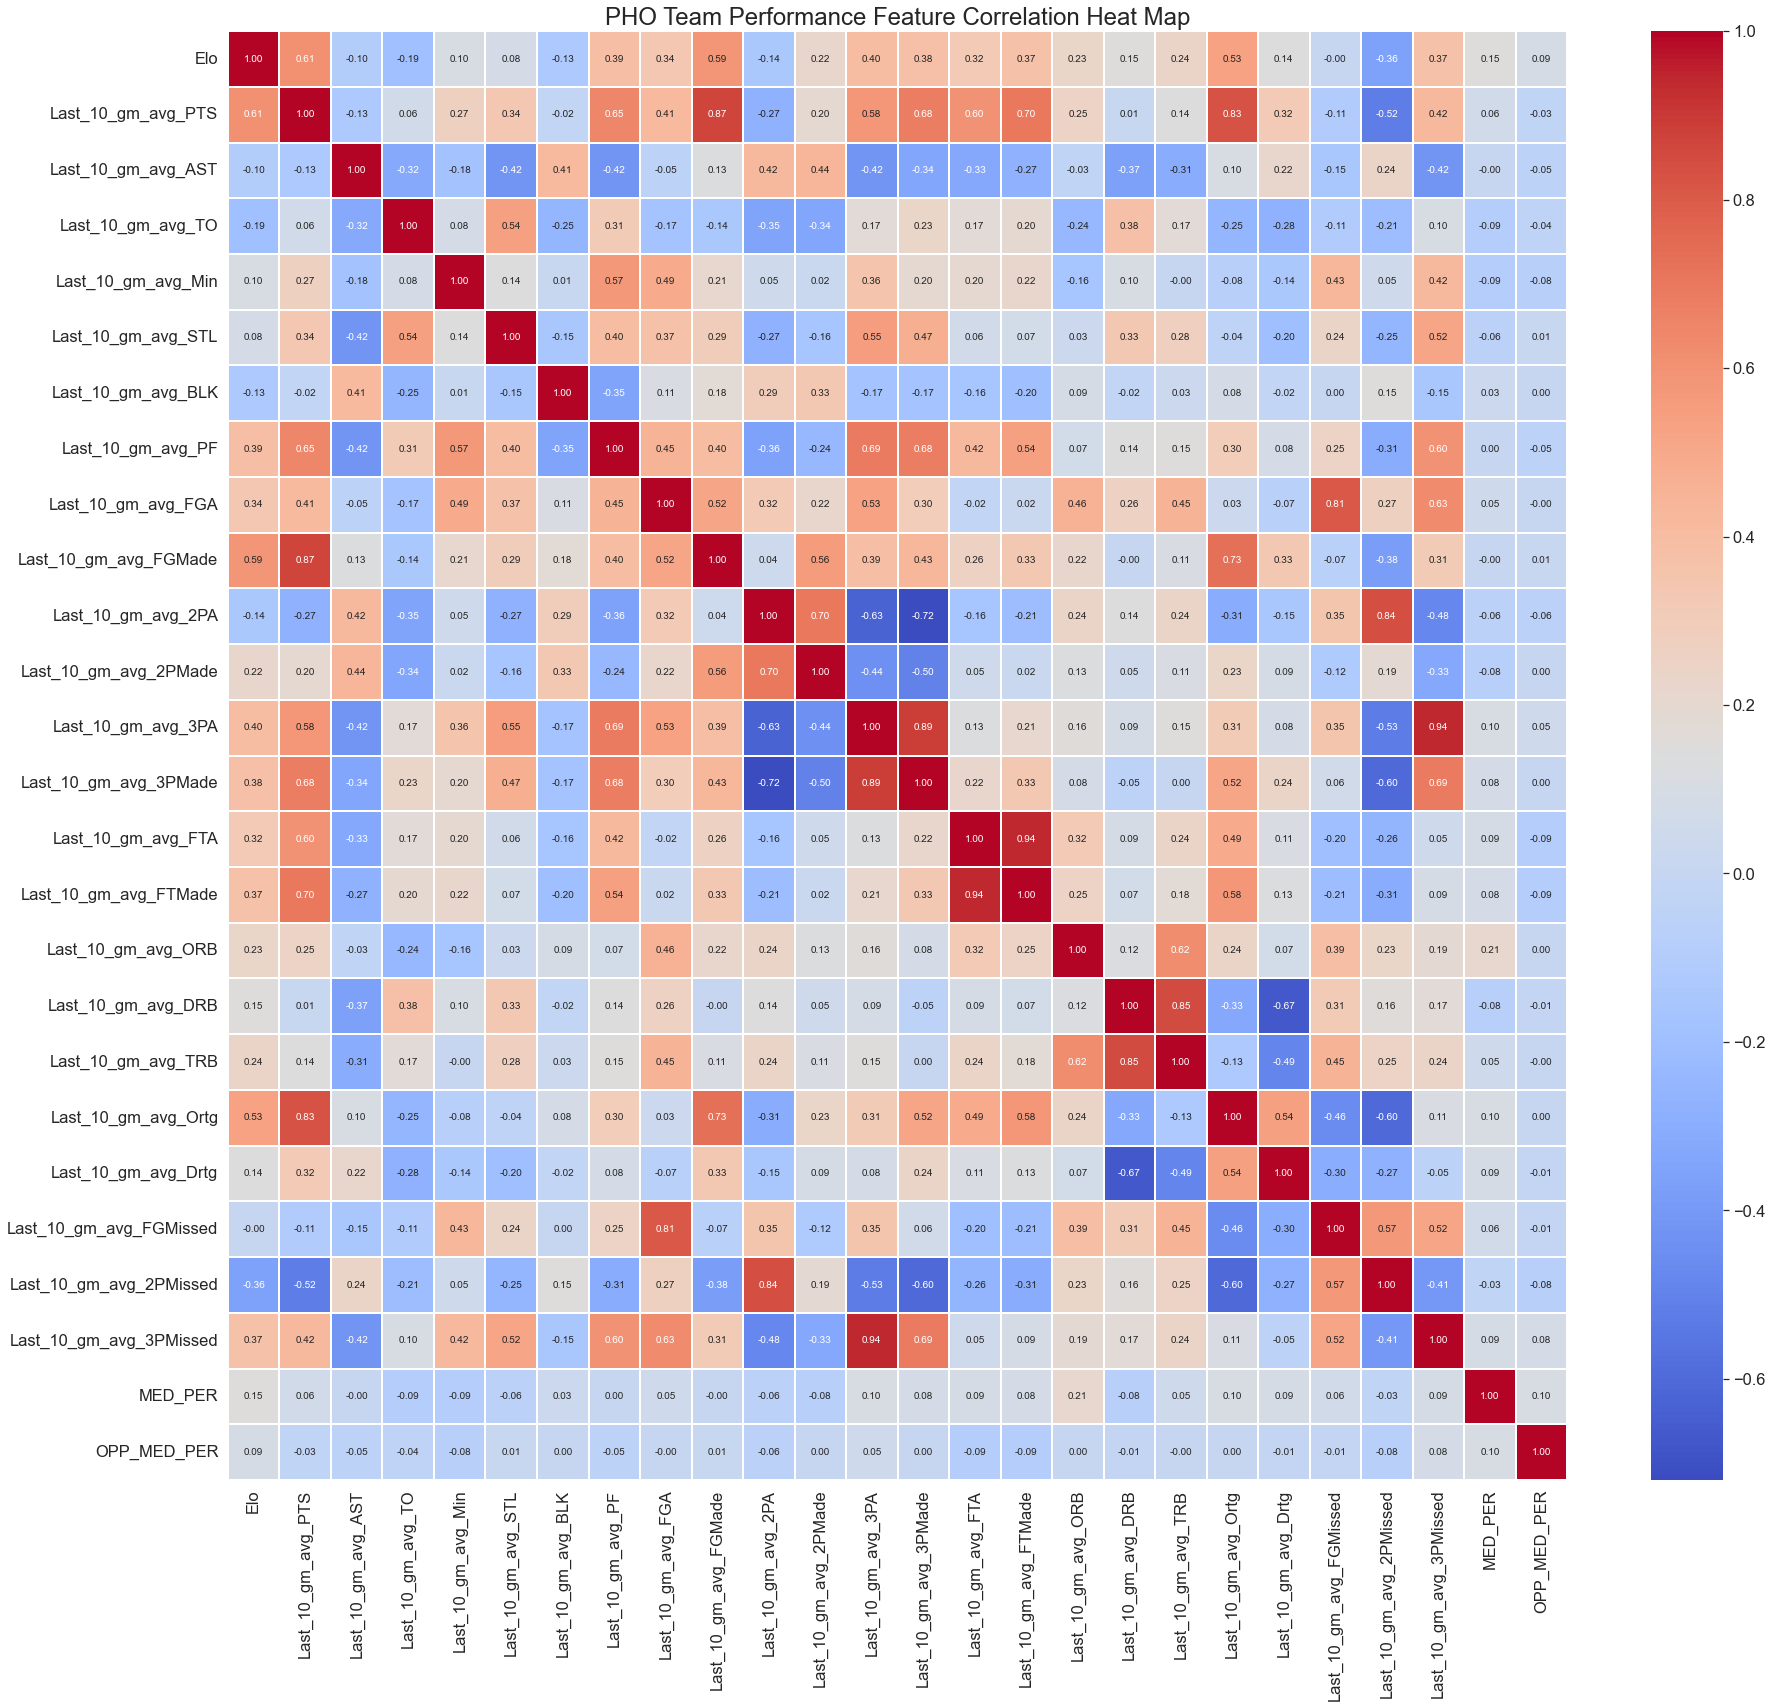

In [64]:
#For fun, lets review how our random team's seasons statistical correlations

cols = ['Elo','Last_10_gm_avg_PTS', 'Last_10_gm_avg_AST',
       'Last_10_gm_avg_TO', 'Last_10_gm_avg_Min', 'Last_10_gm_avg_STL',
       'Last_10_gm_avg_BLK', 'Last_10_gm_avg_PF', 'Last_10_gm_avg_FGA',
       'Last_10_gm_avg_FGMade', 'Last_10_gm_avg_2PA', 'Last_10_gm_avg_2PMade',
       'Last_10_gm_avg_3PA', 'Last_10_gm_avg_3PMade', 'Last_10_gm_avg_FTA',
       'Last_10_gm_avg_FTMade', 'Last_10_gm_avg_ORB', 'Last_10_gm_avg_DRB',
       'Last_10_gm_avg_TRB', 'Last_10_gm_avg_Ortg',
       'Last_10_gm_avg_Drtg', 'Last_10_gm_avg_FGMissed',
       'Last_10_gm_avg_2PMissed', 'Last_10_gm_avg_3PMissed', 'MED_PER',
       'OPP_MED_PER']

randomteamcorr = data[cols]

corrmat = randomteamcorr.corr()
f, ax = plt.subplots(figsize=(30, 25))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
plt.title("{} Team Performance Feature Correlation Heat Map".format(random_team), fontsize = 24)

In [111]:
#Reviewing Team Performance Statistics including PER under correlated heat map
#Calculating Avg PER feature to add to Team Performance
data = final_team_performances_df

team_per = []
opp_per = []
for i, row in data.iterrows():
    game_id = row['GameID']
    stub_rows = player_stats[player_stats['GameID']== game_id]
    team_rows = stub_rows[stub_rows['Teamabbr'] == random_team]
    opp_rows = stub_rows[stub_rows['Teamabbr'] != random_team]
    
    team_per.append(np.median(team_rows['PER'].values))
    opp_per.append(np.median(opp_rows['PER'].values))

data['MED_PER'] = team_per
data['OPP_MED_PER'] = opp_per

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


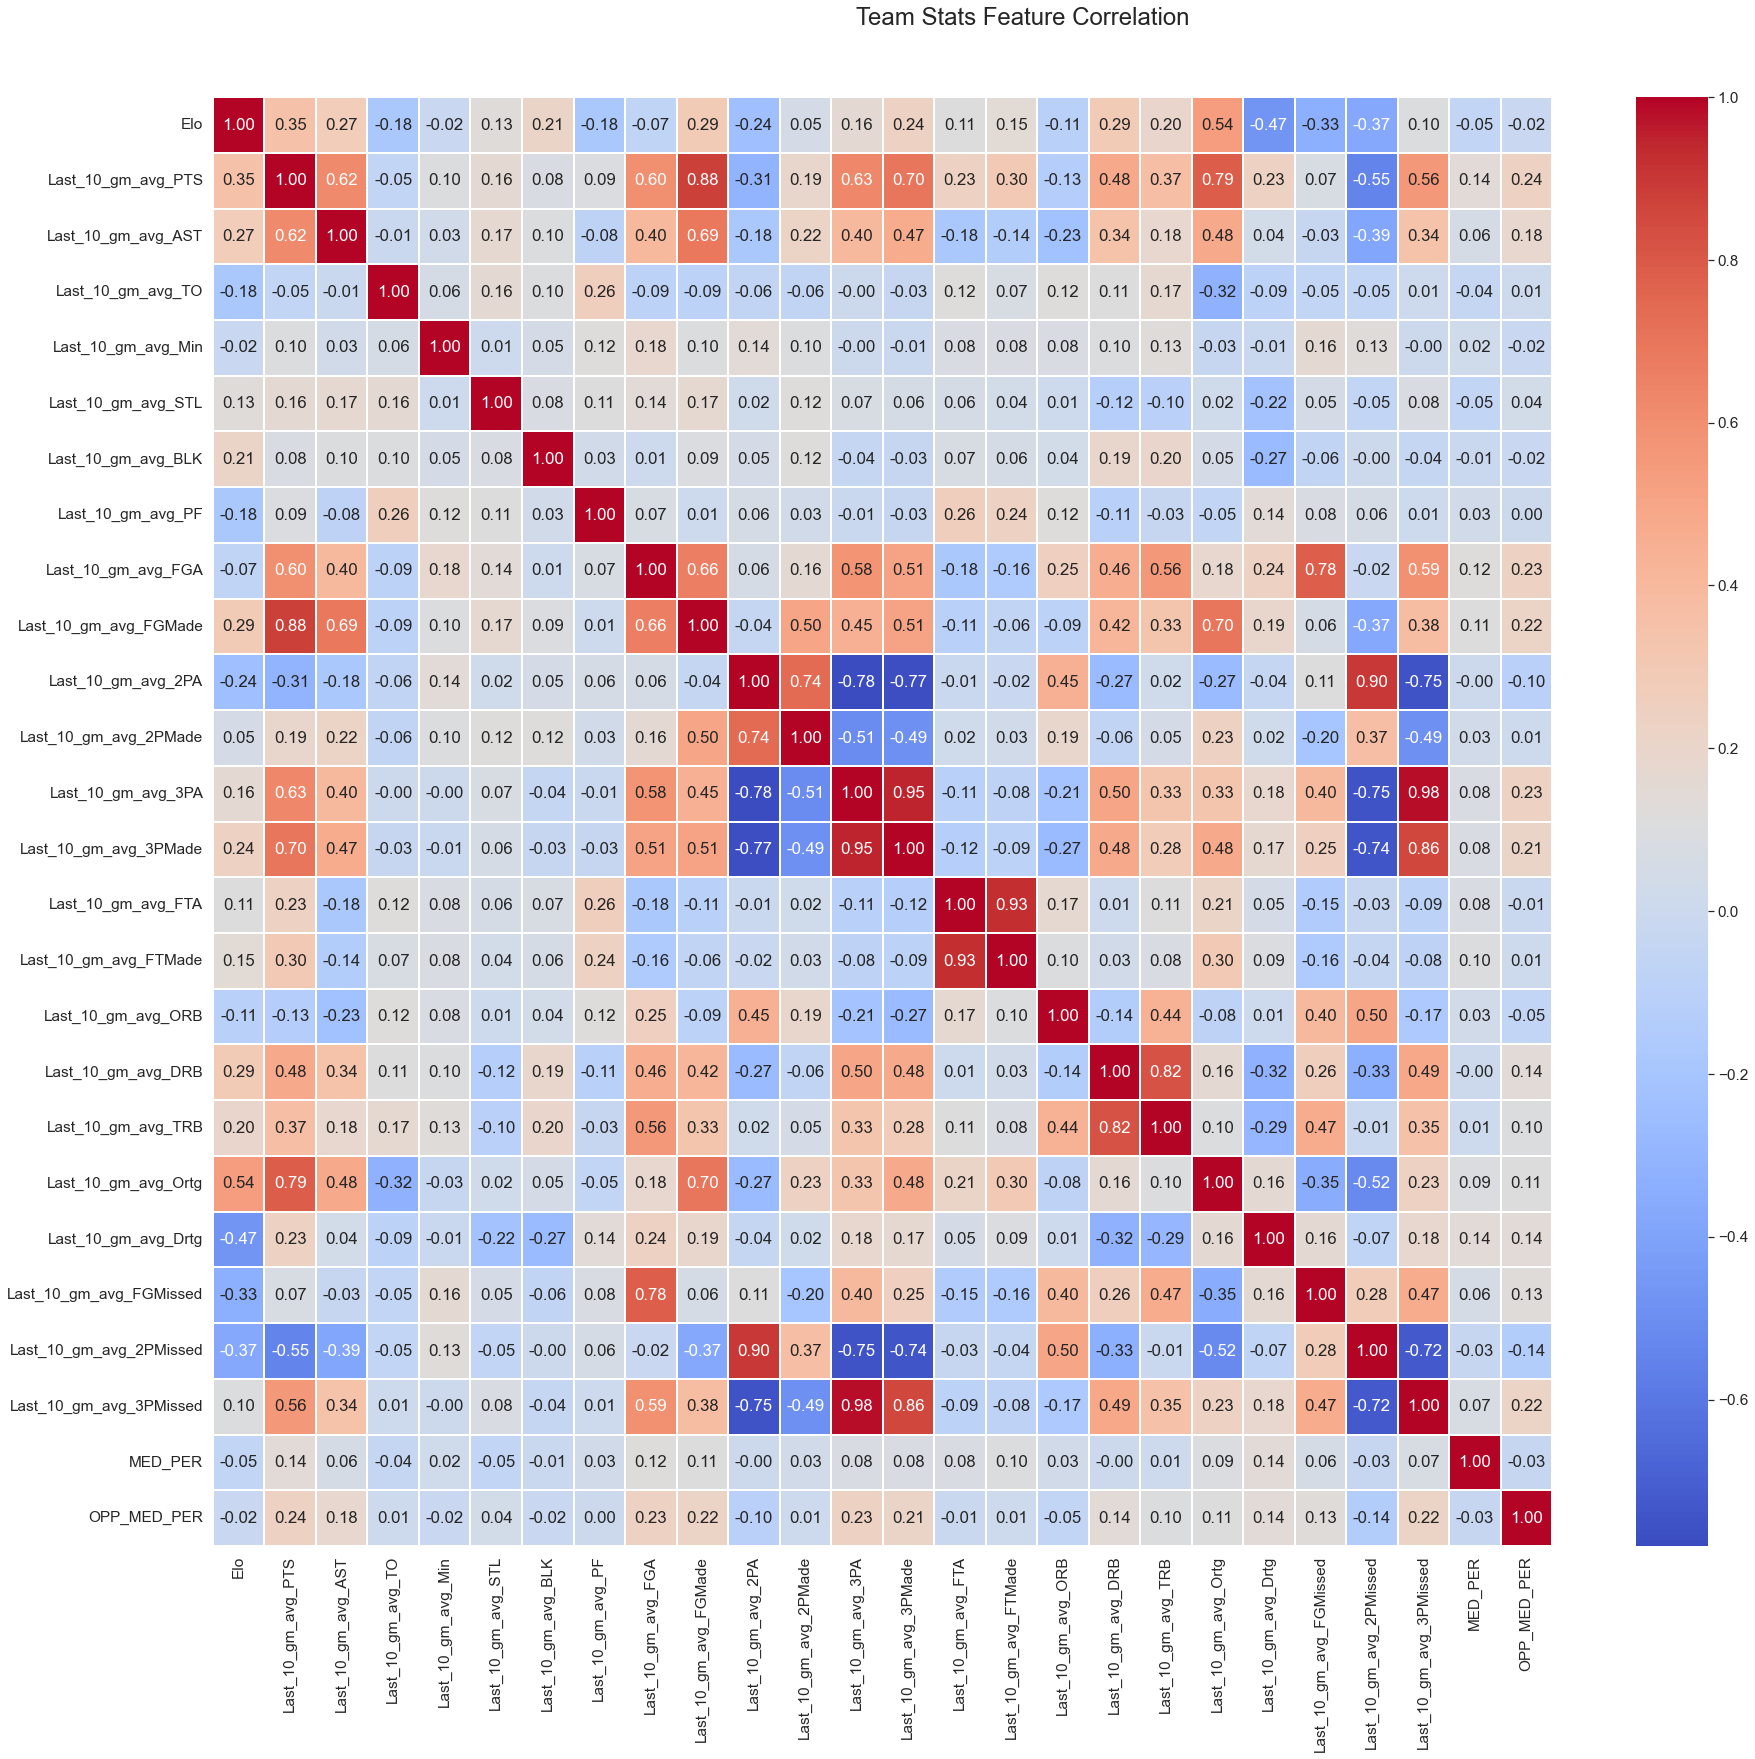

In [120]:
#Building Correlated Heat Map
cols = ['Elo',
       'Last_10_gm_avg_PTS', 'Last_10_gm_avg_AST',
       'Last_10_gm_avg_TO', 'Last_10_gm_avg_Min', 'Last_10_gm_avg_STL',
       'Last_10_gm_avg_BLK', 'Last_10_gm_avg_PF', 'Last_10_gm_avg_FGA',
       'Last_10_gm_avg_FGMade', 'Last_10_gm_avg_2PA', 'Last_10_gm_avg_2PMade',
       'Last_10_gm_avg_3PA', 'Last_10_gm_avg_3PMade', 'Last_10_gm_avg_FTA',
       'Last_10_gm_avg_FTMade', 'Last_10_gm_avg_ORB', 'Last_10_gm_avg_DRB',
       'Last_10_gm_avg_TRB', 'Last_10_gm_avg_Ortg',
       'Last_10_gm_avg_Drtg', 'Last_10_gm_avg_FGMissed',
       'Last_10_gm_avg_2PMissed', 'Last_10_gm_avg_3PMissed', 'MED_PER',
       'OPP_MED_PER']

finalcorr = data[cols]

corrmat = finalcorr.corr()
f, ax = plt.subplots(figsize=(30, 25))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

sns.set(font_scale=1.4)

t= f.suptitle('Team Stats Feature Correlation', fontsize=24)

Positive Correlated Features
FGMade (field goals made), Ortg (Offensive Rating = Score/Possession), TRB (Total Rebounds), AST (assists), PTS (points)

The PER feature doesn't seem to have much correlation to any of the individual stats nor elo. 

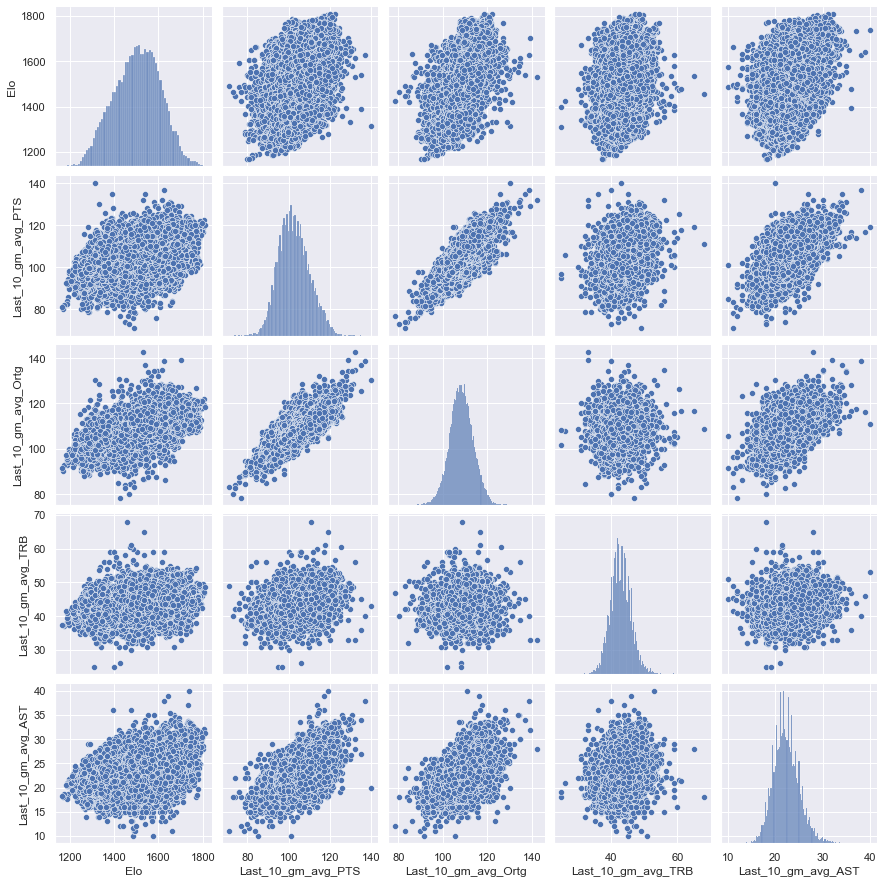

In [66]:
#Build Scatter plot of the positive correlated features
focus = ['Elo', 'Last_10_gm_avg_PTS', 'Last_10_gm_avg_Ortg', 
        'Last_10_gm_avg_TRB', 'Last_10_gm_avg_AST']

focusdata = data[focus]
sns.set(font_scale = 1)
g = sns.pairplot(focusdata)

# Section: 4 Modeling of the Final Team Stats

In this section, we will take our Final Team Stats Dataframe that separates Home Teams and Away teams to be split into training and testing data. 

In [67]:
final_team_stats = pd.read_csv('final_team_stats.csv', index_col = 0)

In [68]:
#remove non-numeric variables and separate into label and features

features = final_team_stats.drop(columns=['Date', 'GameID', 'season', 'H_Team', 'A_Team', 'H_Team_Elo_After', 'A_Team_Elo_After',
       'H_Last_10_gm_avg_PTS10', 
       'A_Last_10_gm_avg_PTS10', 'Label'])

label = final_team_stats['Label']

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.25)

# 4.1 Logist Regression Model

We will examin a basic logistic regression model with our data.

[[ 729  727]
 [ 421 1658]]


/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


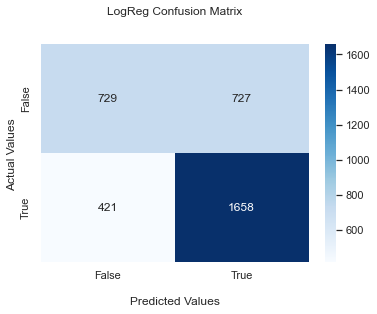

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

LGmodel = LogisticRegression(random_state=42)
LGmodel.fit(X_train, y_train)

y_pred = LGmodel.predict(X_test)
p = metrics.confusion_matrix(y_test, y_pred)
print(p)

ax = sns.heatmap(p, annot=True, cmap='Blues', fmt='g')

ax.set_title('LogReg Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56      1456
           1       0.70      0.80      0.74      2079

    accuracy                           0.68      3535
   macro avg       0.66      0.65      0.65      3535
weighted avg       0.67      0.68      0.67      3535



Our True positives are quite similar to our false negatives, hence we are only around 0.65 precision. Let's see if using different sovlers or parameters can improve that score.

We will compare this report with our training data and see how the fit. 

[[2173 2193]
 [1269 4969]]


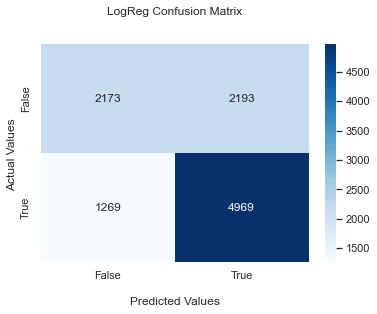

              precision    recall  f1-score   support

           0       0.63      0.50      0.56      4366
           1       0.69      0.80      0.74      6238

    accuracy                           0.67     10604
   macro avg       0.66      0.65      0.65     10604
weighted avg       0.67      0.67      0.67     10604



In [74]:
y_pred = LGmodel.predict(X_train)
p2 = metrics.confusion_matrix(y_train, y_pred)
print(p2)

ax = sns.heatmap(p2, annot=True, cmap='Blues', fmt='g')

ax.set_title('LogReg Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print(classification_report(y_train, y_pred))

Here we have sligty better scores than the test data, which is expected. 

# 4.2 Cross Validation of Paramaters Grid for Logistic Regression 

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
C = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver= solvers, penalty=penalty, C=C)



cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=LGmodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(features, label)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLass

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/lin

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/l

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/s

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/l

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not conv

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algo

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/opti

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/p

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/l

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/l

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/py

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/l

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not conv

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/l

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, Lin

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimi

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algo

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/s

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not conv

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warn

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did no

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Shawn/Documents/UNH_ML_SLF/M

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/li

Best: 0.671571 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.671170 (0.009679) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.670250 (0.008579) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.670675 (0.008708) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.670392 (0.008434) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.671523 (0.009802) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.670392 (0.008434) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.671146 (0.009656) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.670769 (0.008342) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.671264 (0.009699) with: {'

In [76]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

Let's compare the original Logistic Regression model to our tuned-up model. 

In [77]:
import pickle 

basic_model = LogisticRegression(random_state=42)
basic_model.fit(X_train, y_train)
y_pred_basic = basic_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_basic))
print(classification_report(y_test, y_pred_basic))


best_log_random = grid_result.best_estimator_
best_log_random.fit(X_train, y_train)

#Saving the model as a picke file
filename = 'finalized_model.sav'
pickle.dump(best_log_random, open(filename, 'wb'))

y_pred_best_log_random = best_log_random.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_best_log_random))
print(classification_report(y_test, y_pred_best_log_random))

0.6752475247524753
              precision    recall  f1-score   support

           0       0.63      0.50      0.56      1456
           1       0.70      0.80      0.74      2079

    accuracy                           0.68      3535
   macro avg       0.66      0.65      0.65      3535
weighted avg       0.67      0.68      0.67      3535



/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6758132956152758
              precision    recall  f1-score   support

           0       0.64      0.50      0.56      1456
           1       0.69      0.80      0.74      2079

    accuracy                           0.68      3535
   macro avg       0.67      0.65      0.65      3535
weighted avg       0.67      0.68      0.67      3535



[[ 724  732]
 [ 414 1665]]


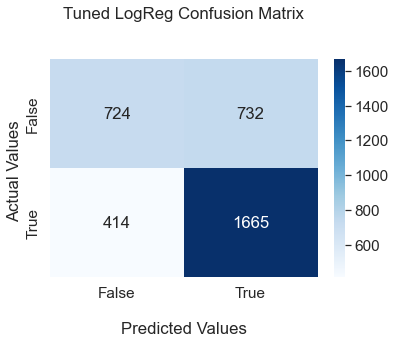

In [121]:
p2 = metrics.confusion_matrix(y_test, y_pred_best_log_random)
print(p2)

ax = sns.heatmap(p2, annot=True, cmap='Blues', fmt='g')

ax.set_title('Tuned LogReg Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Comparing Classification reports we can see that the two logistic regression models show very similar scores, indicating that the paramater tuning helped but not significantly.

# 4.3 K-Nearest Neighbor Model

Our next model to test will be KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(features, label)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.656175 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
0.579979 (0.012196) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.579979 (0.012196) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.606762 (0.012389) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.606927 (0.012429) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.620222 (0.011567) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.620222 (0.011637) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.631963 (0.011418) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.631892 (0.011447) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.637055 (0.013494) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.636843 (0.013362) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.640120 

In [79]:
best_KNN_model = grid_result.best_estimator_
best_KNN_model.fit(X_train, y_train)
y_pred_best_KNN = best_KNN_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_best_KNN))
print(classification_report(y_test, y_pred_best_KNN))

0.6630834512022631
              precision    recall  f1-score   support

           0       0.61      0.51      0.55      1456
           1       0.69      0.77      0.73      2079

    accuracy                           0.66      3535
   macro avg       0.65      0.64      0.64      3535
weighted avg       0.66      0.66      0.66      3535



The KNN grid searched model doesn't offer a better model than the logistic regression even after conducting grid search.

# 4.4 Support Vector Machine 

In [80]:
from sklearn.svm import SVC

model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(features, label)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.672679 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.669307 (0.008846) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.670675 (0.008387) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.546314 (0.014622) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.668670 (0.008801) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.671735 (0.008628) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.547045 (0.014704) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.671099 (0.010693) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.672679 (0.010445) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.557135 (0.014616) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.671500 (0.009252) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.669024 (0.008744) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.588231 (0.000282) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.588231 (0.000282) with: {'C': 0.01, 'gamma': 'scale',

In [81]:
best_SVM_model = grid_result.best_estimator_
best_SVM_model.fit(X_train, y_train)
y_pred_best_SVM = best_SVM_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_best_SVM))
print(classification_report(y_test, y_pred_best_SVM))

0.6758132956152758
              precision    recall  f1-score   support

           0       0.65      0.46      0.54      1456
           1       0.69      0.83      0.75      2079

    accuracy                           0.68      3535
   macro avg       0.67      0.64      0.64      3535
weighted avg       0.67      0.68      0.66      3535



[[ 672  784]
 [ 362 1717]]


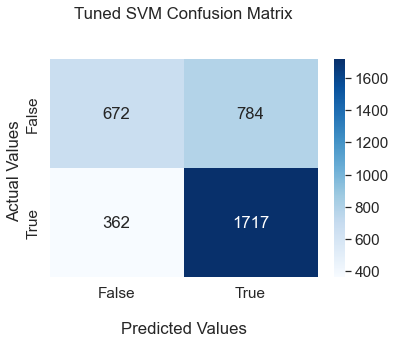

In [123]:
p2 = metrics.confusion_matrix(y_test, y_pred_best_SVM)
print(p2)

ax = sns.heatmap(p2, annot=True, cmap='Blues', fmt='g')

ax.set_title('Tuned SVM Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Utilizing the Support Vector Machine our score is slightly better than KNN or logistic regression. Let's compare to models such as RandomForest or GradientBoosting.

# 4.5 Random Forrest Classifier 

In [82]:
#Build RF model and check parameters
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [83]:
#fitting the model to our training data

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.6616690240452616
              precision    recall  f1-score   support

           0       0.61      0.50      0.55      1456
           1       0.69      0.78      0.73      2079

    accuracy                           0.66      3535
   macro avg       0.65      0.64      0.64      3535
weighted avg       0.66      0.66      0.65      3535



Let's conduct a RandomsearchCV and see if we can imporve this score as it's not even close to our earlier model scores. 

In [84]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 0, stop = 100, num = 12)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [4, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [4, 8, 10],
 'n_estimators': [0,
                  107,
                  214,
                  321,
                  428,
                  535,
                  642,
                  750,
                  857,
                  964,
                  1071,
                  1178,
                  1285,
                  1392,
                  1500]}


In [87]:
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 2, n_jobs = -1, verbose = 2)

In [88]:
random_search.fit(X_train, y_train)
y_pred_rfc_random = random_search.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_rfc_random))
print(classification_report(y_test, y_pred_rfc_random))

Fitting 2 folds for each of 100 candidates, totalling 200 fits


/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
34 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/Users/Shawn/Documents/UNH_ML_SLF/MLassi

0.6701555869872702
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      1456
           1       0.69      0.80      0.74      2079

    accuracy                           0.67      3535
   macro avg       0.66      0.64      0.64      3535
weighted avg       0.66      0.67      0.66      3535



The RandomforestClassifier with a RandomsearchCV, we were able to improve upon the original RandomforestClassifier score, however the score is similar to the previous models.

# 4.6 Gradient Boosting Classifer

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

n_estimators = [int(x) for x in np.linspace(start = 0, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(start = 0, stop = 100, num = 12)]
max_depth.append(None)


parameters = {
    "n_estimators":n_estimators,
    "max_depth":max_depth,
    "learning_rate":[0.01,0.1,1,10,100]
}

gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = parameters, n_iter = 100, cv = 2, verbose=2, n_jobs = -1)

gbc_random.fit(X_train, y_train)
y_pred_gbc_random = gbc_random.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_gbc_random))
print(classification_report(y_test, y_pred_rfc_random))

Fitting 2 folds for each of 100 candidates, totalling 200 fits


/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/Users/Shawn/Documents/UNH_ML_SLF/MLassig

0.65997171145686
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      1456
           1       0.69      0.80      0.74      2079

    accuracy                           0.67      3535
   macro avg       0.66      0.64      0.64      3535
weighted avg       0.66      0.67      0.66      3535



With the various models we used, the best scoring model seem to be the logistic regression model. Of all the models, their precision, recall and f1-scores don't vary much between the models.

# Section 5. Using the Model for inferencing 

In this section we will take a few samples from late 2008, create an average and compare to the averages of samples from late 2020, as a way to see if modern play styles would beat out on older NBA play styles. 

In [90]:
#load model from disk

loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')


In [91]:
#Pull several games from the earliest time frame and several games from the later time frame
data = pd.read_csv('final_team_stats.csv', index_col = 0)
data.sort_values(by = 'Date', ascending = False, inplace=True)

early = data.head(10).mean()

late = data.tail(10).mean()

/var/folders/n4/x3431d_565s25yt88cgb8slc0000gp/T/ipykernel_25917/4167210759.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  early = data.head(10).mean()
/var/folders/n4/x3431d_565s25yt88cgb8slc0000gp/T/ipykernel_25917/4167210759.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  late = data.tail(10).mean()


In [92]:
features = data.drop(columns=['Date', 'GameID', 'season', 'H_Team', 'A_Team', 'H_Team_Elo_After', 'A_Team_Elo_After',
       'H_Last_10_gm_avg_PTS10', 
       'A_Last_10_gm_avg_PTS10', 'Label'])

col = features.columns.tolist()

h_col = [x for x in col if 'H_' in x]
print('h cols (', len(h_col), '): \n', h_col)
a_col = [x for x in col if 'A_' in x]
print('a cols (', len(a_col), '): \n', a_col)

h cols ( 24 ): 
 ['H_Team_Elo_Before', 'H_Last_10_gm_avg_PTS', 'H_Last_10_gm_avg_AST', 'H_Last_10_gm_avg_TO', 'H_Last_10_gm_avg_Min', 'H_Last_10_gm_avg_STL', 'H_Last_10_gm_avg_BLK', 'H_Last_10_gm_avg_PF', 'H_Last_10_gm_avg_FGA', 'H_Last_10_gm_avg_FGMade', 'H_Last_10_gm_avg_2PA', 'H_Last_10_gm_avg_2PMade', 'H_Last_10_gm_avg_3PA', 'H_Last_10_gm_avg_3PMade', 'H_Last_10_gm_avg_FTA', 'H_Last_10_gm_avg_FTMade', 'H_Last_10_gm_avg_ORB', 'H_Last_10_gm_avg_DRB', 'H_Last_10_gm_avg_TRB', 'H_Last_10_gm_avg_Ortg', 'H_Last_10_gm_avg_Drtg', 'H_Last_10_gm_avg_FGMissed', 'H_Last_10_gm_avg_2PMissed', 'H_Last_10_gm_avg_3PMissed']
a cols ( 24 ): 
 ['A_Team_Elo_Before', 'A_Last_10_gm_avg_PTS', 'A_Last_10_gm_avg_AST', 'A_Last_10_gm_avg_TO', 'A_Last_10_gm_avg_Min', 'A_Last_10_gm_avg_STL', 'A_Last_10_gm_avg_BLK', 'A_Last_10_gm_avg_PF', 'A_Last_10_gm_avg_FGA', 'A_Last_10_gm_avg_FGMade', 'A_Last_10_gm_avg_2PA', 'A_Last_10_gm_avg_2PMade', 'A_Last_10_gm_avg_3PA', 'A_Last_10_gm_avg_3PMade', 'A_Last_10_gm_avg_FTA', 

In [93]:
early = early[h_col]
late = late[a_col]

x_new = early.append(late)
x_new = x_new[col]
loaded_model.predict(np.array(x_new).reshape(1,48))

/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

1 indicates that the Home team, in this case statistical averages from home games of in the 2008's, have won the matchup. We can test futher pulling  sets of games from both eras to see what win percentages each era gets. In addition, we can swap home team and away team to see how the match ups end up. 

# Conclusion and Future Considerations

In our investigation, we explored several different models to classify our NBA data. Acquiring data from kaggle, we wrangled, explored, engineered features, and finally modeled the data for prediction accuracy. 

The most accurate model turns out to be our tuned logistic regression model but not by much from our other models such as Support Vectore Machines, GradientBoosting, RandomForest, and KNN. Our top accuracy ranged in the 64%, and falls short of the 66-72% range.

If we had additional time, we would further acquire additional defensive data for feature engineering. It is hypothesized that better features can be produced to improve the classification. Future features to explore would be to acquire player's defensive ratings, in which older NBA stats did not acquire until recent updates to the analysis principles for the game of basketball. In addition, utilizing the current data, a feature that could compare a players performance trend (compare to their seasonal avg) could help predict better player performance for predicting game results. In the same scope, we can review a players career trajectory up (age/performance base) as a player grows to their prime and the reversal of that trajectory while the player age passes their prime in order to assess a more accurate of the seasonal averaged.